# INTRODUCTION

## Overview
In this project, we will be analysing the Kings county housing dataset
Our objective is to use linear regression techniques to develop a model which can be used to predict the price of a home not already described in our original data set, based on the input of other data related to the house. 

Kings count is a county in Washington state. The western portion of it encompasses the city of Seattle. The data set contains sale information related to specific houes. It has around 21,000 records. 


# OBTAIN

## Importing libraries and dataset
First off, lets import the modules we will require for this analysis, as well as the dataset itself. df0 will be our clean, unmodified dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
import warnings; warnings.simplefilter('ignore')
from math import sqrt

pd.options.display.float_format = '{:,.2f}'.format
mpl.rcParams['figure.figsize'] = (20,20)

   
df0 = pd.read_csv('kc_house_data.csv')   

## Preliminary Overview
Lets get an overview of our dataset with standard python methods. 

In [2]:
display(df0.head())
display(df0.describe())
print(type(df0.info()))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,221.00","21,534.00","21,597.00","21,597.00","21,597.00","21,597.00","17,755.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,"1,000,102.00","78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,175.00","322,000.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00","1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00","1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,490.00","645,000.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00","1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
<class 'None

## Value Counts Report
Lets gather some more information about our data set. The function below takes the dataset and returns a dataframe with the following information for each column:

1. The data type of the columns
2. The missing values in the column, expressed as a percentage of the total records. 
3. The number of unique values in the column
4. The most common value in column
5. The percentage of the column's values equal to the most common value in that column
6. The second, third...nth most common values and the percentage of the column that consists of them

In [3]:
def report1 (dataframe,n_highest_counts):
    ''' Returns a dataframe reporting on the value counts of input frame. '''
    
    master={}
        
    for column in dataframe.columns:
        
        master[column]={}
        col_dict = master[column]
        col_dict['type'] = str(dataframe[column].dtypes)
        col_dict['% empty'] = round(((len(dataframe)-dataframe[column].count())/len(dataframe))*100,2)
        col_dict['unique values'] = dataframe[column].nunique()
        
        x = 1
        series1 = dataframe[column].value_counts().head(n_highest_counts)
        series1 = round((series1/len(dataframe)) * 100, 2)        
        
        for index,item in series1.items():
            value_prop = str(x) + 'nth_value_%'
            value_name = str(x) + 'nth_value'
            col_dict[value_name] = index
            col_dict[value_prop] = item
            x += 1
        
    df_report=pd.DataFrame.from_dict(master,orient='index')
    df_report.sort_values(['1nth_value_%'],ascending=False,inplace=True)
        
    return df_report

df_report = report1(df0,10)
display(df_report)

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,...,6nth_value,6nth_value_%,7nth_value,7nth_value_%,8nth_value,8nth_value_%,9nth_value,9nth_value_%,10nth_value,10nth_value_%
view,float64,0.29,5,0.00,89.93,2.00,4.43,3.00,2.35,1.00,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
waterfront,float64,11.00,2,0.00,88.32,1.00,0.68,NaN,nan,NaN,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
yr_renovated,float64,17.79,70,0.00,78.77,"2,014.00",0.34,"2,003.00",0.14,"2,013.00",...,"2,000.00",0.13,"2,005.00",0.13,"1,990.00",0.10,"2,004.00",0.10,"2,009.00",0.10
condition,int64,0.00,5,3,64.92,4,26.29,5,7.88,2,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
sqft_basement,object,0.00,304,0.0,59.39,?,2.10,600.0,1.00,500.0,...,800.0,0.93,400.0,0.85,1000.0,0.69,300.0,0.66,900.0,0.66
floors,float64,0.00,6,1.00,49.42,2.00,38.13,1.50,8.84,3.00,...,3.50,0.03,NaN,nan,NaN,nan,NaN,nan,NaN,nan
bedrooms,int64,0.00,12,3,45.49,4,31.87,2,12.78,5,...,1,0.91,7,0.18,8,0.06,9,0.03,10,0.01
grade,int64,0.00,11,7,41.55,8,28.08,9,12.11,6,...,11,1.85,5,1.12,12,0.41,4,0.13,13,0.06
bathrooms,float64,0.00,29,2.50,24.90,1.00,17.83,1.75,14.11,2.25,...,1.50,6.69,2.75,5.49,3.00,3.49,3.50,3.38,3.25,2.73
zipcode,int64,0.00,70,98103,2.79,98038,2.73,98115,2.70,98052,...,98042,2.53,98034,2.52,98118,2.35,98023,2.31,98006,2.31


# SCRUB
Lets clean our dataset and get rid of useless fluff. To keep track of how much of the original data is left over, let us define a function which we can call after each step in the cleaning process to make sure we arent getting rid of too much data. This function will tell us what percent of the number of rows in the original dataframe still remain in our cleaned and modified dataframe

In [4]:
def row_loss(df_base,df_current):
    ''' Returns list describing difference in row counts between two input frames'''
    
    rows_dropped = len(df_base) - len(df_current)
    rows_left = len(df_current)
    row_loss_perc = ((len(df_base) - rows_dropped)/len(df_base)) * 100
    row_loss_perc = round(row_loss_perc,2)
    
    metrics = [rows_dropped,rows_left,row_loss_perc]
    
    return metrics

def loss_report (df_base,df_current):
    ''' Prints row loss report '''
    stats_list = row_loss(df_base,df_current)
    
    for x in stats_list:
        x = str(x)
      
    string = "Rows Dropped: {}    Rows Left: {}   Percentage Remaining: {}".format(stats_list[0],stats_list[1],stats_list[2])
    
    print(string)
    

## PHASE 1 - Permanent Modifictions. 
In this phase of the scrubbing process, we will recast data types, deal with duplicate values, missing values and placeholders. These are modification to the dataset that must be made in any scenario, and we probably wont need to tweak these at any point. The end result of phase one will be dataframe that we will process further, but will serve as a stable base for us to try different processing techniques down the line. 

Lets create two list: a primary_removals list which will contain features we definitely want to drop, and a secondary_removals list where we will add features we may want to drop after our first model. Will will gather the column names in these lists as we go, and at the end wil will creat a dataframe (df1) that reflects the changes made in phase one. 

In [5]:
primary_removals = []
secondary_removals = []

df1 = df0.copy()

### Recasting Data Types
We now take a closer look at which columns have a datatype of 'object', and whether we may turn them into numbers. 

In [6]:
df_objects = list(df_report[df_report['type'] == 'object'].index)
display(df_objects)

['sqft_basement', 'date']

Lets turn these into more appropriate data types.

In [7]:
df1['date'] = pd.to_datetime(df1['date'])
#df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'])

I commented out the line to recast sqft_basement. Turns out it has some problematic values in it. Lets hold off for now, and revisit later. 

As for the 'date' column, on second thought, lets drop it. We need to convert all our data into numeric form. We could conceivably do this with the date column but it would require some engineering. But if we think about it, the date column is probably not very useful to us in this case. It describes the date that the house in question was sold. I dont really see how this can have any significant effect on the price of a house. Lets at least drop it for now and perhaps we can retrain our model with a modified version of it later to see if it makes any difference. 

In [8]:
df1 = df1.sort_values('date',ascending=True)
df1 = df1.drop(['date'],axis=1)

### Duplicate Records

We would like to assume that each row in the dataset refers to just one house. The 'id' column is described as being the unique identifier for a house. However, even though the dataset is 21597 records long, 'id' has 21420 unique values, and no missing values. This might indicate the existence of duplicates. 

The function below returns a list of id's that occur more than once in the dataframe. We will use this list to filter the dataframe to find all rows with those id numbers and sort them by id number so we can observe the rows with the same Id numbers one on top of the other. If we see that the rest of the data in both rows with the same ID is also the same, we can confirm that these are true duplicates. 

In [9]:
def duplicates_list (dataframe,column):
    '''Returns list of index labels of duplicate column values'''
    
    df_id_Counts = dataframe[column].value_counts()
    repeats = df_id_Counts[df_id_Counts > 1]
    repeats = list(repeats.index)
    
    return repeats

repeated_values = duplicates_list(df1,'id')

df_dups = df1[df1['id'].isin(repeated_values)]
df_dups.sort_values(by='id',inplace=True)

dups_count = len(df_dups) - len(repeated_values)
percent_of_duplicates = dups_count/len(df1) 
percent_of_duplicates = round(percent_of_duplicates *100,2)
                         
print("{} ( {}% ) of the rows in the dataframe are duplicate records".format(dups_count,percent_of_duplicates))
display(df_dups.head(10))


177 ( 0.82% ) of the rows in the dataframe are duplicate records


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,"300,000.00",6,3.00,2400,9373,2.00,0.00,0.00,3,7,2400,0.0,1991,0.00,98002,47.33,-122.21,2060,7316
2494,1000102,"280,000.00",6,3.00,2400,9373,2.00,nan,0.00,3,7,2400,0.0,1991,0.00,98002,47.33,-122.21,2060,7316
16800,7200179,"150,000.00",2,1.00,840,12750,1.00,0.00,0.00,3,6,840,0.0,1925,0.00,98055,47.48,-122.21,1480,6969
16801,7200179,"175,000.00",2,1.00,840,12750,1.00,0.00,0.00,3,6,840,0.0,1925,nan,98055,47.48,-122.21,1480,6969
11421,109200390,"245,000.00",3,1.75,1480,3900,1.00,0.00,0.00,4,7,1480,0.0,1980,0.00,98023,47.30,-122.37,1830,6956
11422,109200390,"250,000.00",3,1.75,1480,3900,1.00,0.00,0.00,4,7,1480,0.0,1980,0.00,98023,47.30,-122.37,1830,6956
12406,123039336,"244,900.00",1,1.00,620,8261,1.00,0.00,0.00,3,5,620,0.0,1939,nan,98106,47.51,-122.36,1180,8244
12405,123039336,"148,000.00",1,1.00,620,8261,1.00,0.00,0.00,3,5,620,0.0,1939,0.00,98106,47.51,-122.36,1180,8244
7785,251300110,"225,000.00",3,2.25,2510,12013,2.00,0.00,0.00,3,8,2510,0.0,1988,0.00,98003,47.35,-122.31,1870,8017
7786,251300110,"358,000.00",3,2.25,2510,12013,2.00,0.00,0.00,3,8,2510,0.0,1988,0.00,98003,47.35,-122.31,1870,8017


As we can see, the duplicate ids refer to the same houses as they refer to houses with the same number of bedrooms, bathrooms, square footage etc. Given that only 0.82% of the rows of the dataset, we can safely discard them. Once we have done that, lets set the id number as the index of the dataframe, since now it truly is a unique identifier. This should help us with merges later on and maintain the integrity of our data. Lets also take a look at where our row loss metric stands


In [10]:
df1 = df1.drop_duplicates('id')
df1.set_index('id',inplace=True)

print(loss_report(df0,df1))

Rows Dropped: 177    Rows Left: 21420   Percentage Remaining: 99.18
None


### Placeholders and Missing Values

Finding missing values is simple enough: we can use native python methods to examine the null values in a given dataframe or series. But as we know, oftentimes datasets have palceholder values that are actually null values, although not encoded as such. Finding these is trickier. One way is to look at the counts of unique values in each dataframe column to see if anything jumps out.

Forunately, our custom df_report which we got from our report1 function will come in handy to find out if any particular values constitute and abormally large proportion of a gievn dataframe column. This could be an indication that there is a placeholder value that will skew our results. 

Lets take a look at the report again. 

In [11]:
display(df_report)     

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,...,6nth_value,6nth_value_%,7nth_value,7nth_value_%,8nth_value,8nth_value_%,9nth_value,9nth_value_%,10nth_value,10nth_value_%
view,float64,0.29,5,0.00,89.93,2.00,4.43,3.00,2.35,1.00,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
waterfront,float64,11.00,2,0.00,88.32,1.00,0.68,NaN,nan,NaN,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
yr_renovated,float64,17.79,70,0.00,78.77,"2,014.00",0.34,"2,003.00",0.14,"2,013.00",...,"2,000.00",0.13,"2,005.00",0.13,"1,990.00",0.10,"2,004.00",0.10,"2,009.00",0.10
condition,int64,0.00,5,3,64.92,4,26.29,5,7.88,2,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan
sqft_basement,object,0.00,304,0.0,59.39,?,2.10,600.0,1.00,500.0,...,800.0,0.93,400.0,0.85,1000.0,0.69,300.0,0.66,900.0,0.66
floors,float64,0.00,6,1.00,49.42,2.00,38.13,1.50,8.84,3.00,...,3.50,0.03,NaN,nan,NaN,nan,NaN,nan,NaN,nan
bedrooms,int64,0.00,12,3,45.49,4,31.87,2,12.78,5,...,1,0.91,7,0.18,8,0.06,9,0.03,10,0.01
grade,int64,0.00,11,7,41.55,8,28.08,9,12.11,6,...,11,1.85,5,1.12,12,0.41,4,0.13,13,0.06
bathrooms,float64,0.00,29,2.50,24.90,1.00,17.83,1.75,14.11,2.25,...,1.50,6.69,2.75,5.49,3.00,3.49,3.50,3.38,3.25,2.73
zipcode,int64,0.00,70,98103,2.79,98038,2.73,98115,2.70,98052,...,98042,2.53,98034,2.52,98118,2.35,98023,2.31,98006,2.31


#### Analysis

We will now analyze these resulte. We will then create two list: a primary_removals list which will contain features we definitely want to drop, and a secondary_removals list where we will add features we 
From the preceeding, we can make the following observations:

1. "View" is a binary categorical variable, indicating whether a house has been viewed or not. 90% of the 'view' column has a value of '0', meaning 90% of the houses have not been viewed. I wonder how useful this really is. Lets add it to our secondary_removals list. 

2. Similary, 88% of 'waterfront' is also '0'. It seems most likely that waterfront is a binary categorical variable, i.e. a house either is not on the waterfront (in which case ot gets a 'o' value), or it is (in which case it gets '1'). Perhaps being on the waterfront makes a house more valuable, and if we build a model that takes into account whether a house is on the waterfront it may be more accurate. However, 11% of the data is missing. Lets fill those missing values with 0, since most houses likely are not waterfront adjacent. Lets also add this to our secondary list. 

3. year renovated definitely seems like it should be deleted. 80% of the values are '0', which cannot be explained by the nature of the information in this column ('0' is not a year). And as we saw before, 17% of the values are missing. Lets add this to primary_removals. 

4. condition again seems to be a categorical variable. the values range from 1 to 5, and its probably a way of saying "on a scale of 1 to 5 what is the condition of the property". The most frequent value is 3, occuring 65% of the time, then 4 at 26% of the time. It tapers of before and after. If I had to guess, these values are normally distributed. 3 is right down the middle of the scale, and it makes sense that most houses would be in average condition, and more extreme conditions are less and less likely. We can double check this with a histogram. But we definitely want to retain condition in our feature set. 

5. sqft_basement might be of questionable utility. Around 60% of the values are '0'. 2% are '?'. The remainign values are in increments of 100, which is highly unlikely for a quantity that one would expect to be more continuos and varying (compare with other square foot based columns). Lets add this to secondary_removals, but also change the placeholder values. 

6. Around 50% of houses have only 1 floor. 40% have 2 floors. It goes down from there. This makes sense. Lets leave this feature in place. 

7. A large portion of houses(45%) have three bedrooms. 32% have 4 bedrooms. The rest have lesser or more. This also in line with what we would expect. 3 seems like the numebr of bedrooms we would expect most houses to have, so this is not unusual. Lets keep this feature

8. 7 is the most common value for grade at 42%. Given that grade ranges from 3 to 13 and 7 is kind of in the middle, this also makes sense. Again, one would expect most houses to be graded average. 

9. Bathrooms also does not seem to have any glaring outliers, and seems in line with our expectations for the most common number of bathrooms across homes. 

10. Lastly, we must remove the one value from the dataframe where price is 0. It must be bad data, and it will disrupt our models later on. 


In [12]:
primary_removals = ['yr_renovated']
secondary_removals = ['view','sqft_basement']

df1=df1.drop(primary_removals,axis=1)
df1 = df1[df1['price'] != 0]

df1['waterfront'] = df1['waterfront'].fillna(value=0)
df1['sqft_basement'].replace('?',0,inplace=True)
df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'])


display(df1.head())
print(df1.info())
print(row_loss(df0,df1))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
2202500290,"435,000.00",4,1.00,1450,8800,1.00,0.00,0.00,4,7,1450,0.00,1954,98006,47.57,-122.14,1260,8942
7853361370,"555,000.00",4,2.50,3310,6500,2.00,0.00,0.00,3,8,3310,0.00,2012,98065,47.52,-121.87,2380,5000
7197300105,"550,000.00",4,2.50,1940,10500,1.00,0.00,0.00,4,7,1140,800.00,1976,98052,47.68,-122.11,2200,10500
3438501320,"295,000.00",2,2.50,1630,1368,2.00,0.00,0.00,3,7,1280,350.00,2009,98106,47.55,-122.36,1590,2306
472000620,"790,000.00",3,2.50,2600,4750,1.00,0.00,0.00,4,9,1700,900.00,1951,98117,47.68,-122.40,2380,4750


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 2202500290 to 9106000005
Data columns (total 18 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.1 MB
None
[177, 21420, 99.18]


## Phase 2 - Transient Modifications
In this phase of the data scrubbing process, we will make modifications that we may want to alter down the line. We will scrub for outliers, normalize some features, drop features with high colinearity and scale our featurs. Since we may want to change which features we apply these transformation to, and how to apply them. Which is why we will try to abstract our process out into functions that we can easily reuse when the time comes to try to improve our models by trying different processing techniques on our dataset. We will collect the lists of columns to remove and process in the dictionary phase2_take1.

Lets begin our exploration of the dataset with a scatter mattrix, to get some insight into outliers and categorical variables. We will also make a copy of the dataframe as we have modified it thus far, because we may want to tweak what we do next in a future iteration of this process. 

In [13]:
df2 = df1.copy()

phase2_take1 = {}

#pd.plotting.scatter_matrix(df1,figsize=(20,20)); 

### Outliers
I want to first remove outliers before scaling data. This seems like the correct approach, because I feel like scaling the data with outliers will produce skewed distributions which I will have to recorrect for outliers anyways, and end up removing the same outlying values I will now. I also want to use min-max scaling as I understand it is better at bringing data into more homogenous scales across columns.

First lets draw boxplots for all our columns to identify which columns we should cull outliers from.

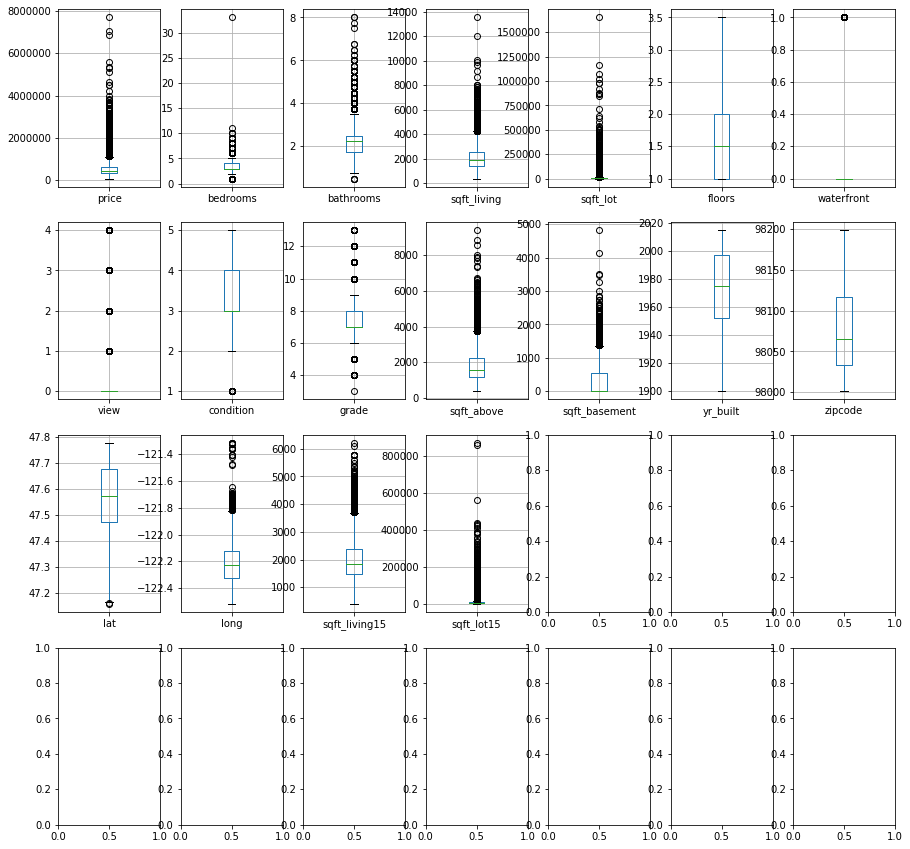

In [14]:
def box_matrix (dataframe):
    ''' generates boxplost for all columns in dataframe'''
    df = dataframe
    col_nums = len(df.columns)
    if col_nums % 7 > 0:
        chart_cols = int(round((col_nums/7)+1,0))
    else:
        chart_cols = int(round((col_nums/7),0))

    figure, ax = plt.subplots(chart_cols,7,figsize=(15,15))

    ax = ax.reshape(-1)

    for i,col in enumerate(df.columns):
        df.boxplot(column=col,ax=ax[i])
     

box_matrix(df2)

From these boxplots, we can identify some good candidates for culling outliers.

In [15]:
cull_cols = ['sqft_lot15','price','sqft_lot','sqft_living15','bedrooms']

Now lets write a couple of functions to cull values. 
To the first one we will pass a dictionary of columns and the highest values we want to retain in each column, which we specifiy manually for each column. 

The second function removes all outliers above a certain percentile for all columns passed into it in list form. 

The third one will use the second function with different threhold values to chart the data loss that results at each threshold, and allow us to identify an optimum threshold. 

In [16]:
def rm_outliers_dict (dataframe, culling_dict):
    ''' Remove values above specified threshold specified for each column'''
    outliers_list = []
    for col in culling_dict.keys():
        outlier_indices = list(dataframe[dataframe[col] >= culling_dict[col]].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list)        
    
    return dataframe

def rm_outliers_threshold (dataframe, columns, threshold):
    '''Removes values above specified quantile threshold for all columns passed as list'''
    outliers_list = []
    for col in columns:
        outlier_indices = list(dataframe[dataframe[col] >= dataframe[col].quantile(threshold)].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list) 
    return dataframe

def cull_report (dataframe,columns,base_threshold,df_base):
    '''Returns report frame describing row loss from base frame per increment of threshold'''
    
    report_dict = {}
        
    y = int(base_threshold * 100)
    
    for x in range (100,y,-1):
        
        x = float(x/100)
        
        df = rm_outliers_threshold(dataframe,columns,x)
        loss_metrics = row_loss(df_base,df)
        report_dict[str(x)] = loss_metrics
    
    report_df = pd.DataFrame.from_dict(report_dict,orient='index',columns=['rows_dropped','rows_left','row_loss_perc'])
    
    return report_df

First lets remove outliers from our categorical variables. We want to do this by specifying thresholds for each, lest we accidently remove too much data. 

In [17]:
culling_dict = {
    'bedrooms':15,
    'bathrooms':6
}

phase2_take1['categ_culled'] = culling_dict

df2 = rm_outliers_dict(df2,culling_dict)
loss_report(df1,df2)



Rows Dropped: 17    Rows Left: 21403   Percentage Remaining: 99.92


Now lets remove outliers from continuos variables. First we will see what a good quantile threshold is that results is the least loss of overall frame data. 

<Figure size 1440x720 with 0 Axes>

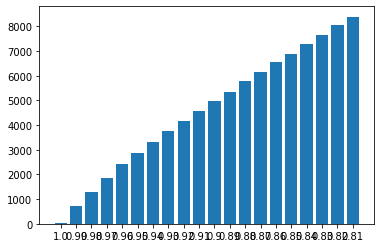

<Figure size 1440x720 with 0 Axes>

In [18]:
contin_cull = ['sqft_lot15','price','sqft_lot','sqft_living15']
phase2_take1['contin_cull'] = cull_cols

df_cull_report = cull_report(df2,contin_cull,.8,df1)

plt.bar(df_cull_report.index,df_cull_report['rows_dropped'])
plt.figure(figsize=(20,10))

It seems like removing rows containing a value that exceeds the .97 quantile for any of the continuous columns is a good place for us to take out the more extreme outliers without losing too much of our data. Lets drop those rows. 

In [19]:
df2 = rm_outliers_threshold (df2, cull_cols,.97)
phase2_take1['contin_cull_thresh'] = .97
loss_report(df1,df2)

Rows Dropped: 3405    Rows Left: 18015   Percentage Remaining: 84.1


Lets see if this improved out scatter plots.

In [20]:
#pd.plotting.scatter_matrix(df1,figsize=(20,20));

### Normalizing features. 
Lets pull histograms of our features to get a sense of their distributions. 

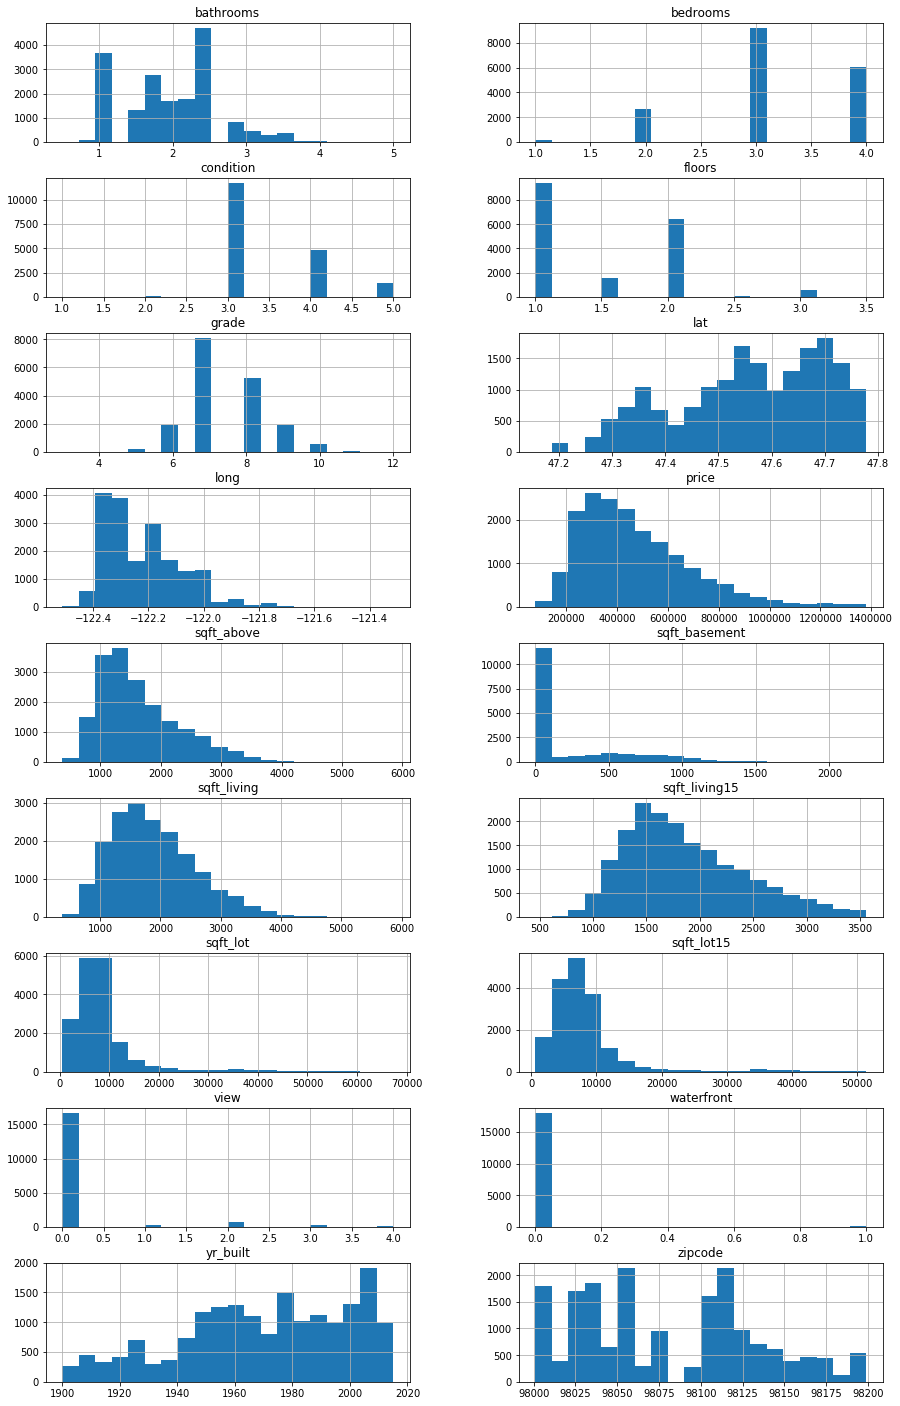

In [21]:
df2.hist(bins=20,layout=(9,2),figsize=(15,25));

From these histograms we can see that our continuos variables could benefit from normalization. However, I wonder if we should normalize 'price', given that it will be our target variable? Opinion is divided on whether normalizing or scaling the target is a good idea. Lets hold off for now, and perhaps we can revisit this question later.

In [22]:
cols_normed = ['sqft_above','sqft_living15','sqft_lot','sqft_lot15','sqft_living']
phase2_take1['cols_normed'] =cols_normed

Below is a function that will normalize specified columns in a dataframe using np.log. Lets use it to normalize the columns we want. 

In [23]:
def logarize (dataframe,columns):
    
    df = dataframe
    
    for col in columns:
        df[col] =df[col].map(lambda x: np.log(x))
    
    return df

df2 = logarize(df2,cols_normed)

Lets plot histograms again to make sure. 

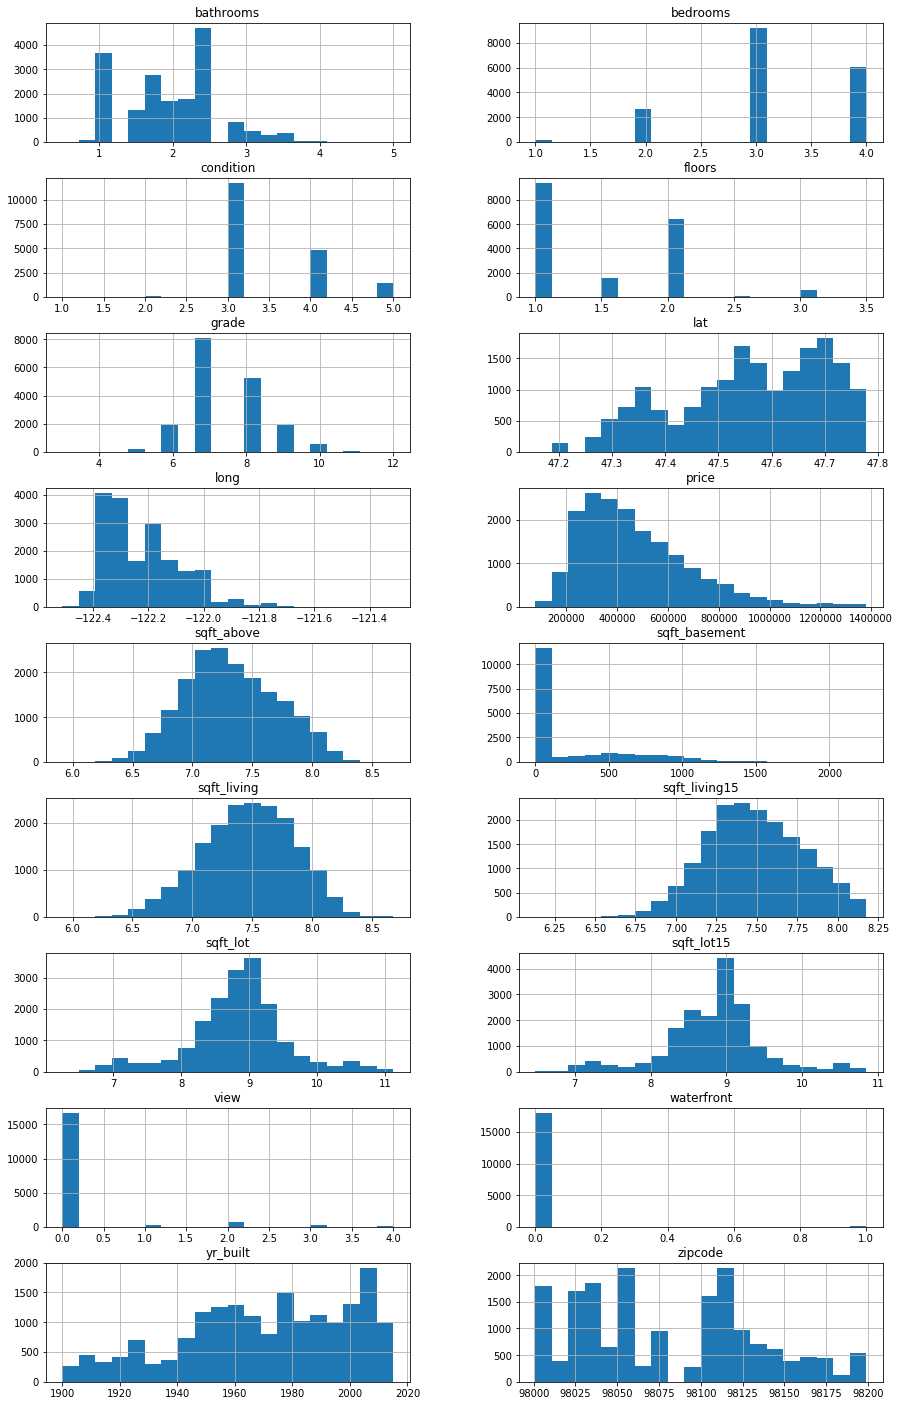

In [24]:
df2.hist(bins=20,layout=(9,2),figsize=(15,25));

Good! now Price and the Square footage features have much more normal distributions. 

### Colinearity

Lets check colinearity across all columns, to help us remove redundant features. 
A heatmap of correlation values will helpful to visually assess correlation among the features. 

The function below generates a clean, non-redundant heatmap of correlation values for the columns of our dataframe. 

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa44379bfd0>)

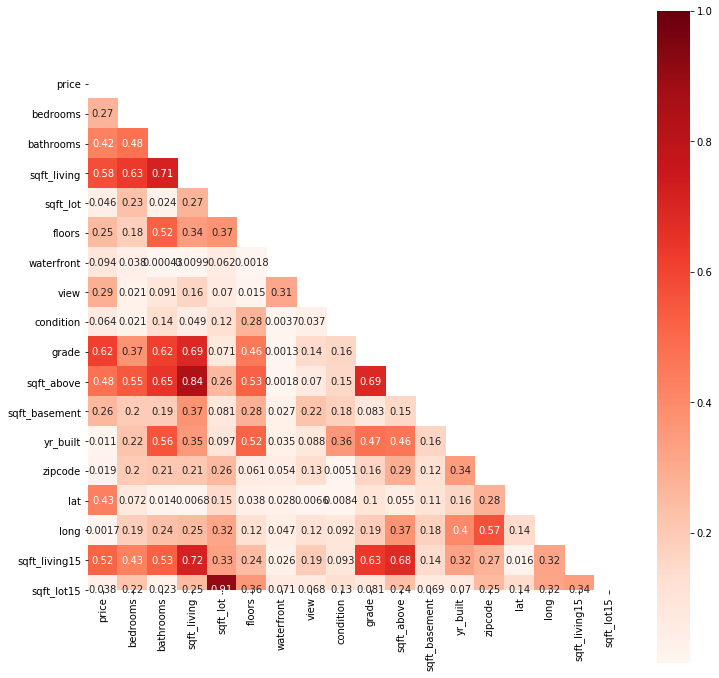

In [25]:
def colinearity_plot(corr,figsize=(12,12)):
    '''non-redundant heatmap of colinearity among columns of dataframe passed in'''
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax

colinearity_plot(np.abs(df2.corr()))

It looks like some features a strongly co-related, and hence good candidates for removal on account of the multi-colinearity they introduce into the model. 

The function below returns a series consisting of pairs of columns with a Pearson correlation co-efficient higher than 
the specified threshold. The column pairs are displayed as elements of a multilevel index.

We will use this function to return a list of feature pairs with a co-relation value higher than 0.75.

In [26]:
 def high_corr(dataframe,threshold):
    '''returns multi indexed series of feature pairs with correlation above specified threshold'''
    corr = dataframe.corr()
    sign_corr = corr[abs(corr) > threshold]
    sign_corr = sign_corr.stack()
    sign_corr.drop_duplicates(inplace=True)
    sign_corr = sign_corr[sign_corr != 1]
    
    
    return sign_corr

display(high_corr(df2,0.75))

sqft_living  sqft_above   0.84
sqft_lot     sqft_lot15   0.91
dtype: float64

#### Analysis

    Looks like sqft_above and sqft_lot15 have very high levels of corelation with other, more on point features. Lets remove them. 

In [27]:
colinear_columns = ['sqft_above','sqft_lot15']
phase2_take1['colinear_columns'] = colinear_columns

df2 = df2.drop(colinear_columns,axis=1)

### Categorical Variables
We must evaluate our features to see if any of them can rightly be treated as categorical variables, and then undertake the appropriate transformations of our data. From the scatter plots we drew before it seems that Zipcode definitely seems like a good for the application of one hot encoding. So does Waterfront. However, the remaining variables that look categorical from the scatter plots seem...inherently numeric, granted they dont have a large range of values. The number of floors a house has is still a number. Condition and grade are attempts to quantify qualitative features, and as such have already been converted to numeric features for us. 

Im also going to make a copy of the df2 frame here, before applying one hot encoding to the dataframe, because I need a dateframe in this state for the next section on exploration

In [28]:
categ_cols =  ['zipcode','waterfront']
phase2_take1['categ_cols'] = categ_cols

df_zipcode = df2.copy()

Now lets run one hot encoding on zipcode and then compile our final scaled dataframe. The function below returns a dataframe with the one-hot columns for the specified columns tacked on to the original dataframe.

In [29]:
def category_frame (dataframe,categ_cols):
    for col in categ_cols:
        cat_frame = pd.get_dummies(dataframe[col],drop_first=True)
        cat_frame = cat_frame.astype('int64')
        
        dataframe = dataframe.merge(cat_frame,left_index=True,right_index=True)        
        dataframe.fillna(0)
    return dataframe

categ_cols = ['zipcode']

df2 = category_frame(df2,categ_cols)

### Scaling


Its time to scale our features. I will use min-max, since I have already removed outliers. 

In [30]:
def min_max_col (series):
    scaled = (series - min(series)) / (max(series) - min(series))
    return scaled

def df_scaler (dataframe,col_list):
    for col in col_list:
        dataframe[col] = min_max_col(dataframe[col])
    return dataframe

scaled_cols = list(df2.columns)
scaled_cols.remove('price')
phase2_take1['scaled_cols'] = scaled_cols

df2 = df_scaler(df2,scaled_cols)

In [31]:
phase2_take1['contin_cull_thresh'] = 0.97
print(list(phase2_take1.keys()))

['categ_culled', 'contin_cull', 'contin_cull_thresh', 'cols_normed', 'colinear_columns', 'categ_cols', 'scaled_cols']


### Consolidated Reprocessing Function
In case we want to revisit our dataset and pre-process it differently to make improvements to our model, lets define a master function with which we can easily reprocess out data. We will feed it a dictionary specifying which columns to scrub for outliers, the columns we want to normalize using np.log and which columns to convert to one hot encoded categories. It will return a processed dataframe. 

In [54]:
def pre_process (dataframe,dictionary):
    
    dict = dictionary
    
    dataframe = rm_outliers_dict(dataframe,dict['categ_culled'])
    
    dataframe = rm_outliers_threshold(dataframe,dict['contin_cull'],dict['contin_cull_thresh'])
    
    dataframe = logarize(dataframe,dict['cols_normed'])
    
    dataframe = dataframe.drop(dict['colinear_columns'],axis=1)
    
    dataframe = category_frame(dataframe,dict['categ_cols'])
    
    for col in categ_cols:
        if col in dictionary['scaled_cols']:
            dictionary['scaled_cols'].remove(col)
    
    dataframe = df_scaler(dataframe,dict['scaled_cols'])
    
    dataframe = dataframe.fillna(0)
    
    print(loss_report(df1,dataframe))
        
    return dataframe
    
    

# EXPLORE

## QUESTION 1: How does home price and value vary geographically?
I would like to explore the variations in data across zipcodes in depth. It would be nice to have a geographic sense of house values, would'nt it? Lets import the GeoPands library to generate some map based visualizations to see how the different metrics in our dataset vary across geographic regions.


In [33]:
import geopandas as gpd

df_zipcode = df_zipcode.groupby('zipcode').median()
df_zipcode.reset_index(level=0, inplace=True)

king_count = gpd.read_file('king_county_shapefile/Zipcodes_for_King_County_and_Surrounding_Area_Shorelines__zipcode_shore_area.shp')

king_count.drop(['OBJECTID','ZIP','ZIP_TYPE'],axis=1,inplace=True) 
king_count['ZIPCODE'] = pd.to_numeric(king_count['ZIPCODE'])
king_count = king_count.merge(df_zipcode,left_on='ZIPCODE',right_on='zipcode',how='inner')

king_count['coords']= king_count['geometry'].apply(lambda x : x.representative_point().coords[:])
king_count['coords']= [coords[0] for coords in king_count['coords']]

#dropping the western most zipcodes. Theyre sparsley populated, not very itneresting and is skewing out maps below
king_count = king_count[king_count['long'] < -122.00]
#king_count = king_count[king_count['zipcode'] != 98022]

### Price 
Lets start by looking at what zipcodes have the highest median sale price 

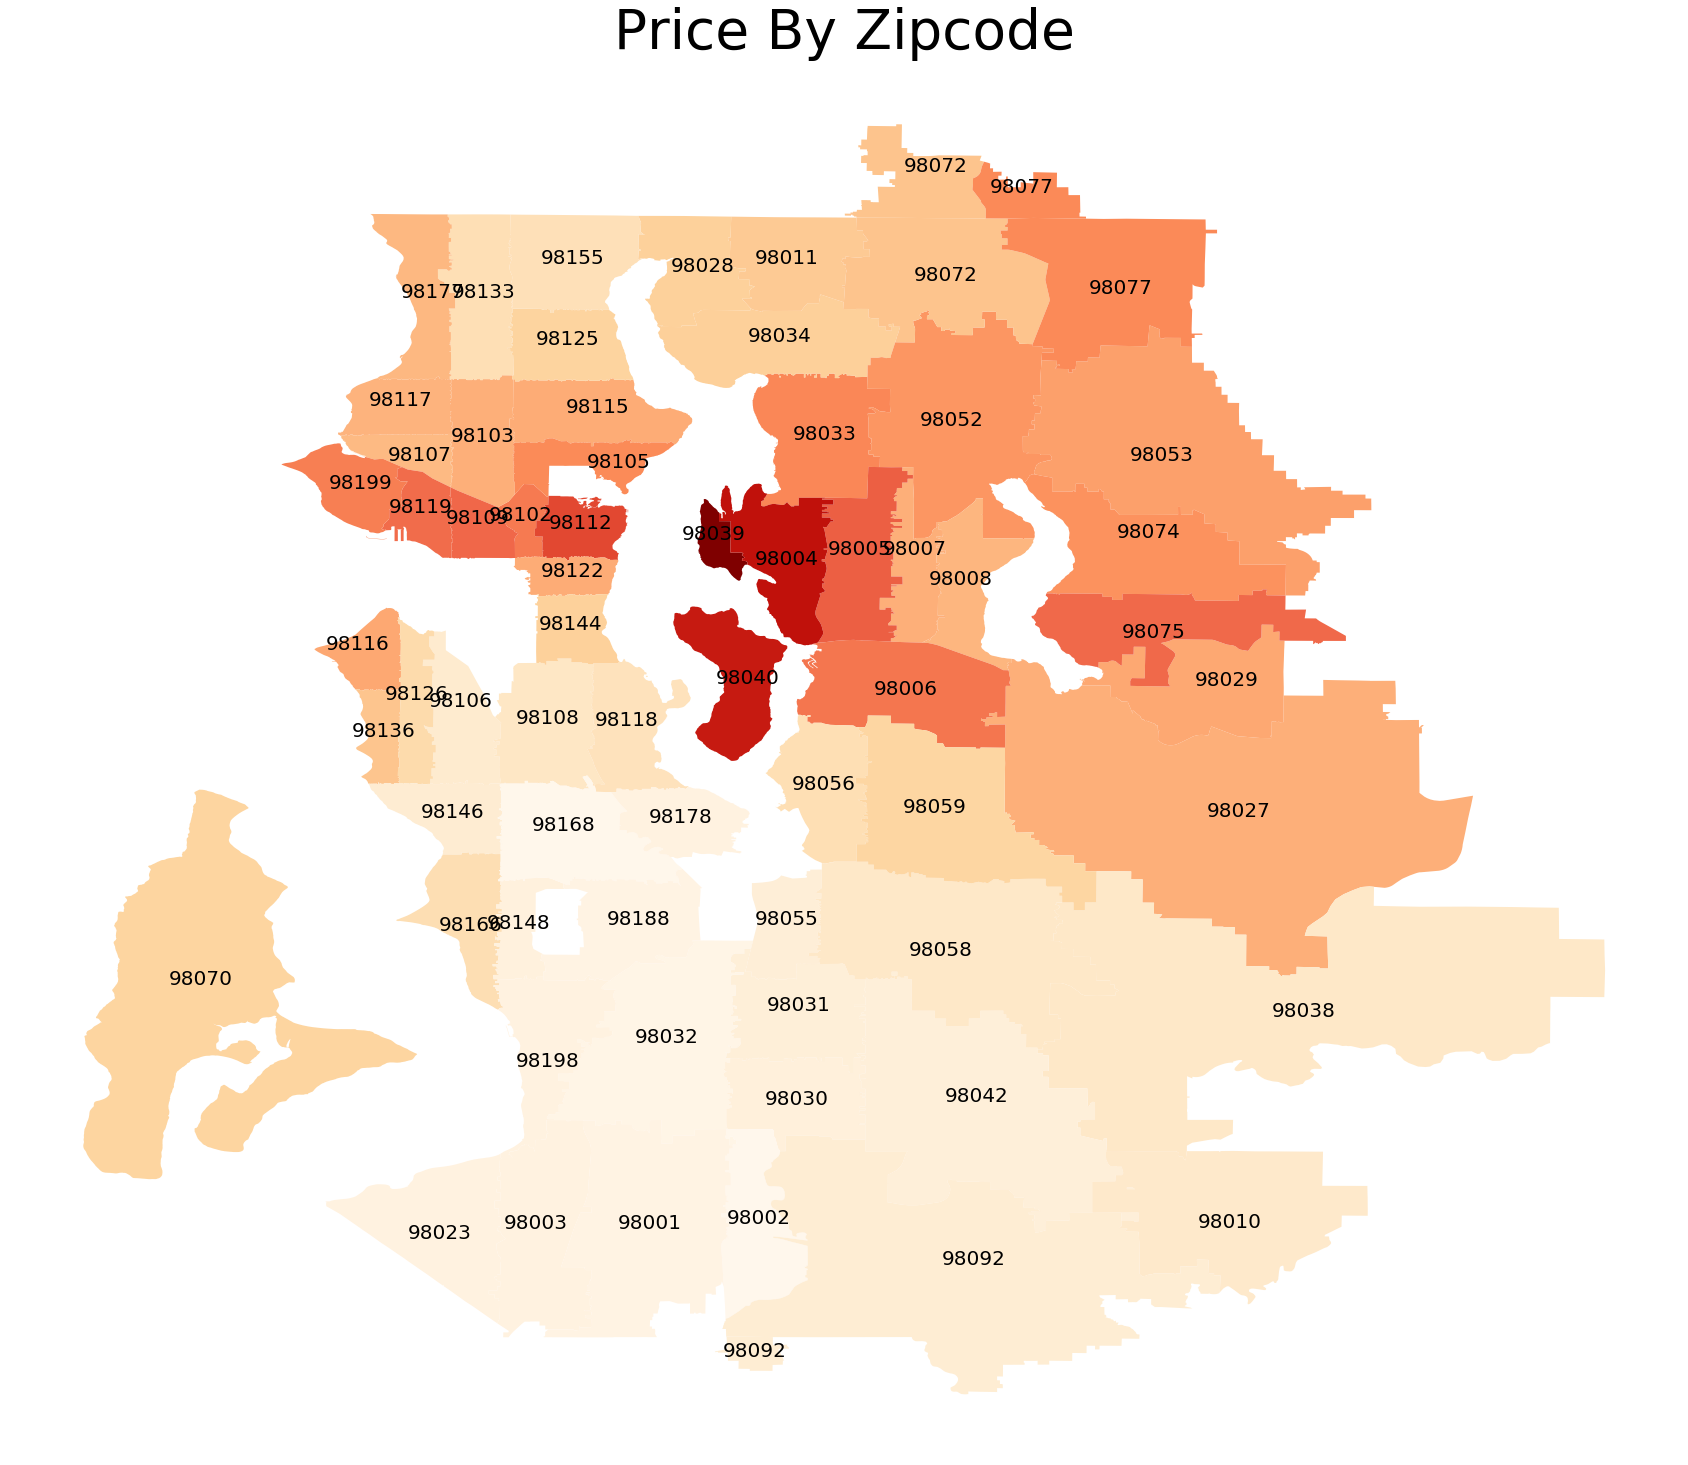

In [34]:
mpl.rcParams['figure.figsize'] = (30,30)

title_dict = {'fontsize': 55,
 'fontweight' : 15}

king_count.plot(column='price',cmap='OrRd',legend=False)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],
                 horizontalalignment='center',size=20)

plt.axis('off')
plt.title('Price By Zipcode',fontdict=title_dict)

plt.savefig('plot_images/price_map')

As one would expect, the price of houses seems to get higher closer to the city center and drop as we head out. 
98040 and 98039 seem to have the most expensive properties! I wonder why that is?


### Price per square foot

Let's engineer a new feature called "Price/Sqft" which will reflect the price per square foot. My hypothesis is that this metric will vary in tandem with geographic location. 

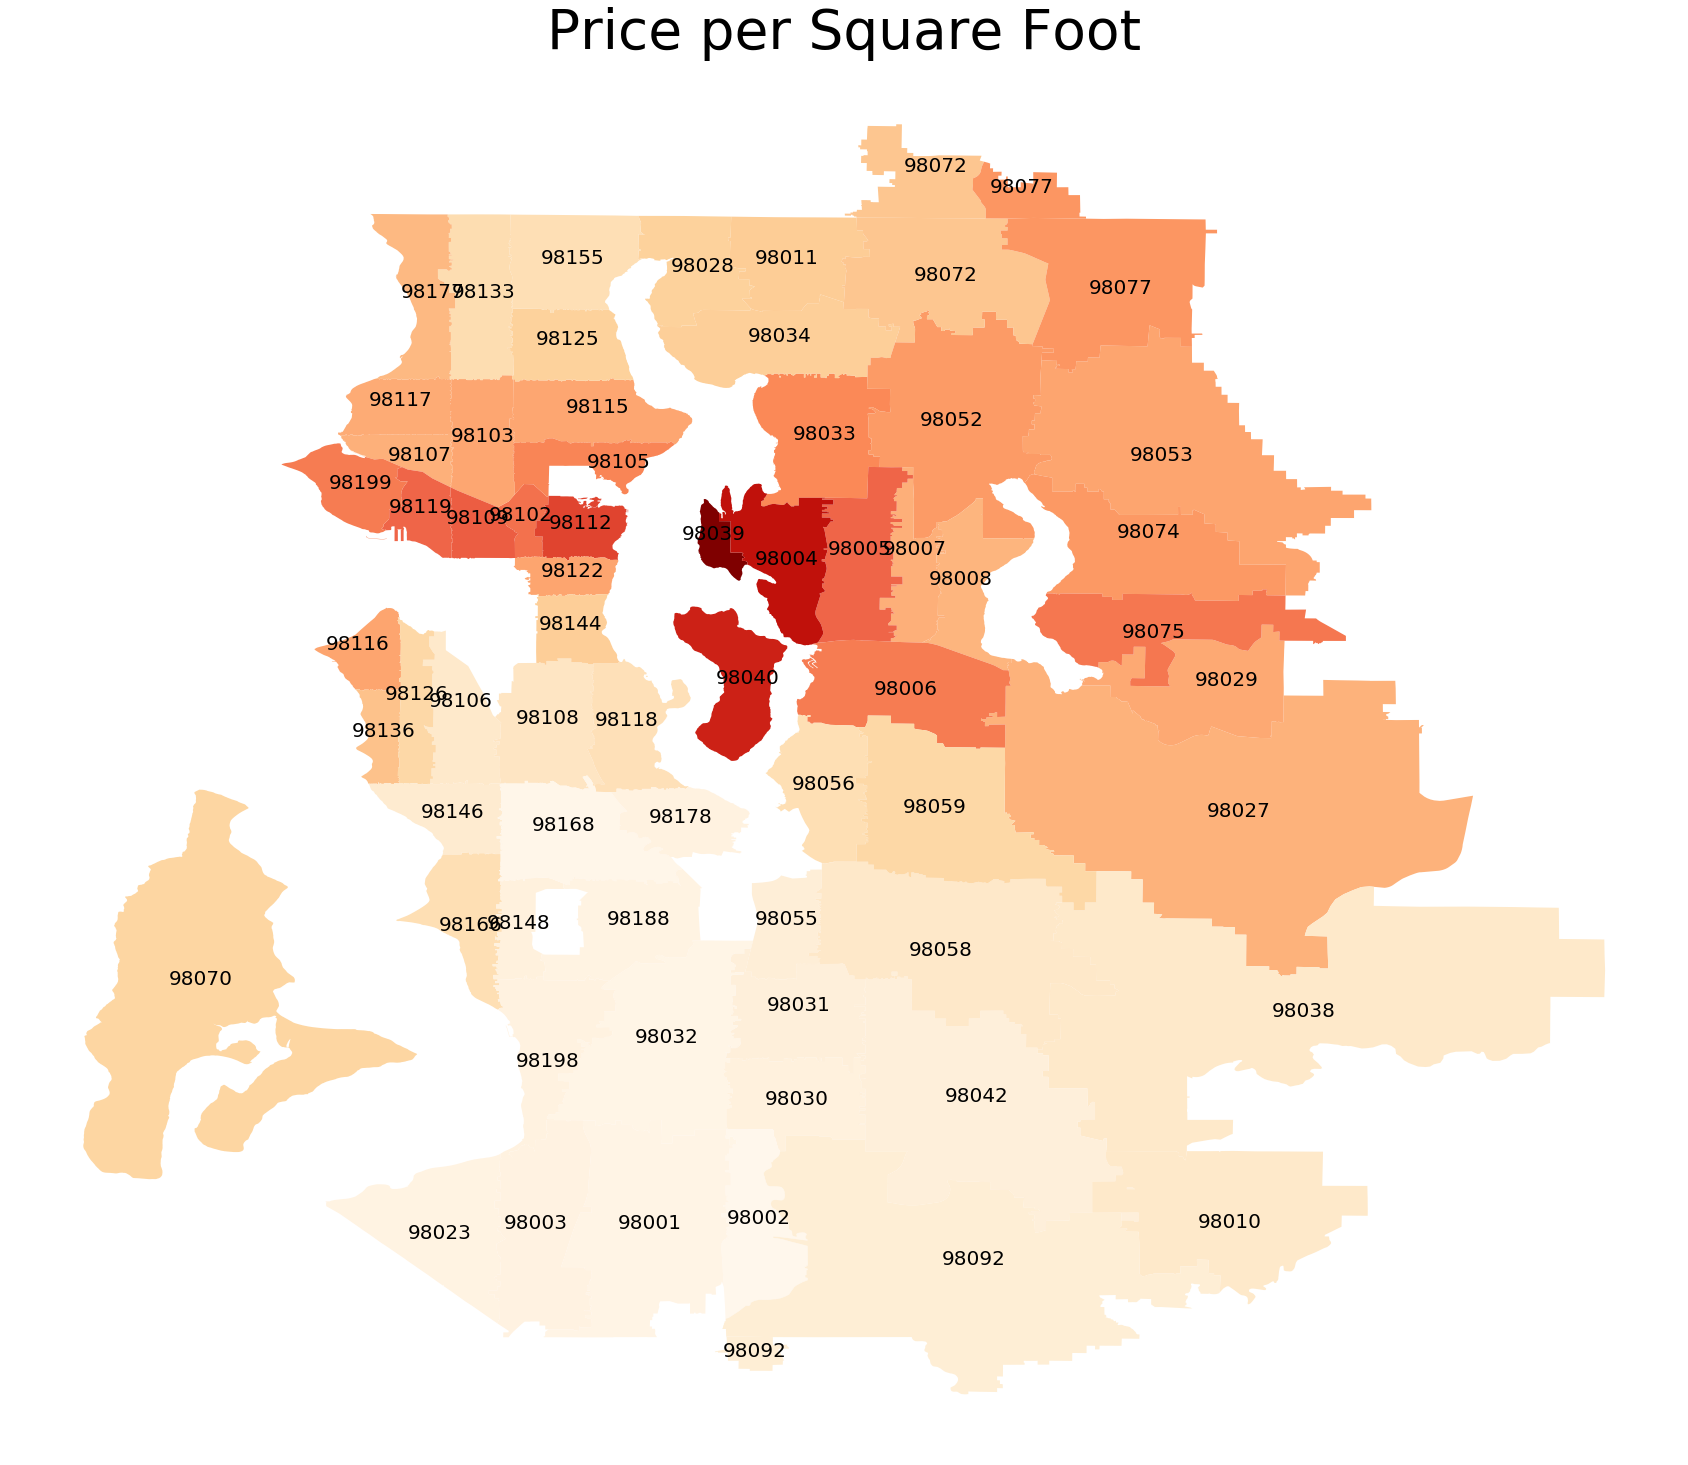

In [35]:
king_count['price/sqft'] = king_count['price']/king_count['sqft_living']

king_count.plot(column='price/sqft',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Price per Square Foot',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/price_sqft_map')

This is a more stable metric and aligns closely with the proposition that living space is more valuable closer to the city center. 

## QUESTION 2: How are living space and lot size related, and how do they vary geographically?

### Indoor Square Footage

Now lets see how indoor square footage varies across the region. I suspect, it will vary in the opposite way as price, which is to say that indoor square footage per house will be smaller towards the city center and larger as we go out. 

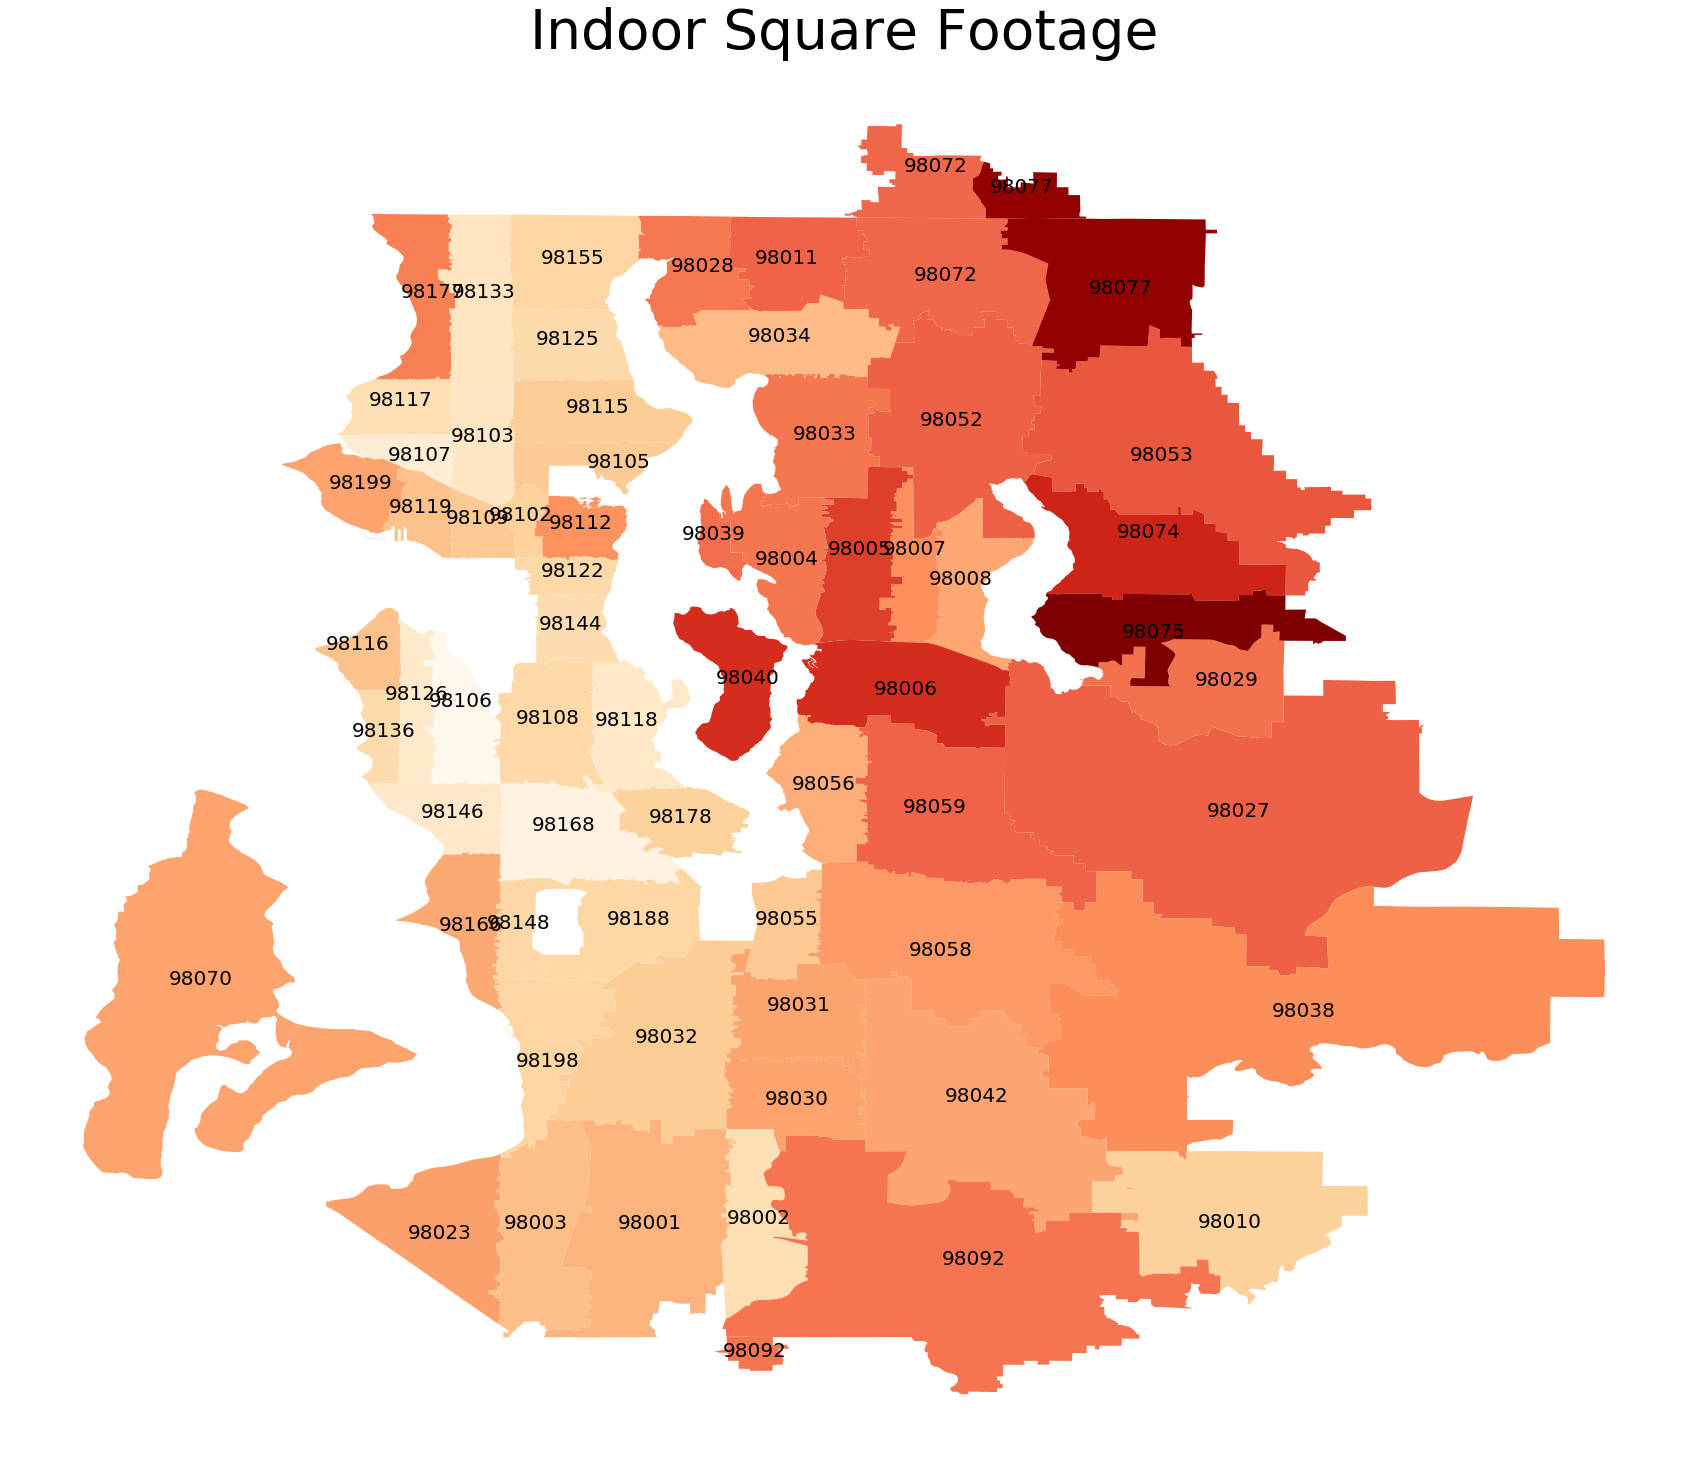

In [36]:
king_count.plot(column='sqft_living',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Indoor Square Footage',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/sqft_above_map')

Sure enough, our hypothesis checks out. Oh my 98075 looks like it has some huge mansions!It also seemed like the median price here was high too, relative to its neighbors.
This must be a fancy neighborhood! 

### Lot size
Now lets see see how lot sizes change. I Imagine similarly to indooor square footage. 

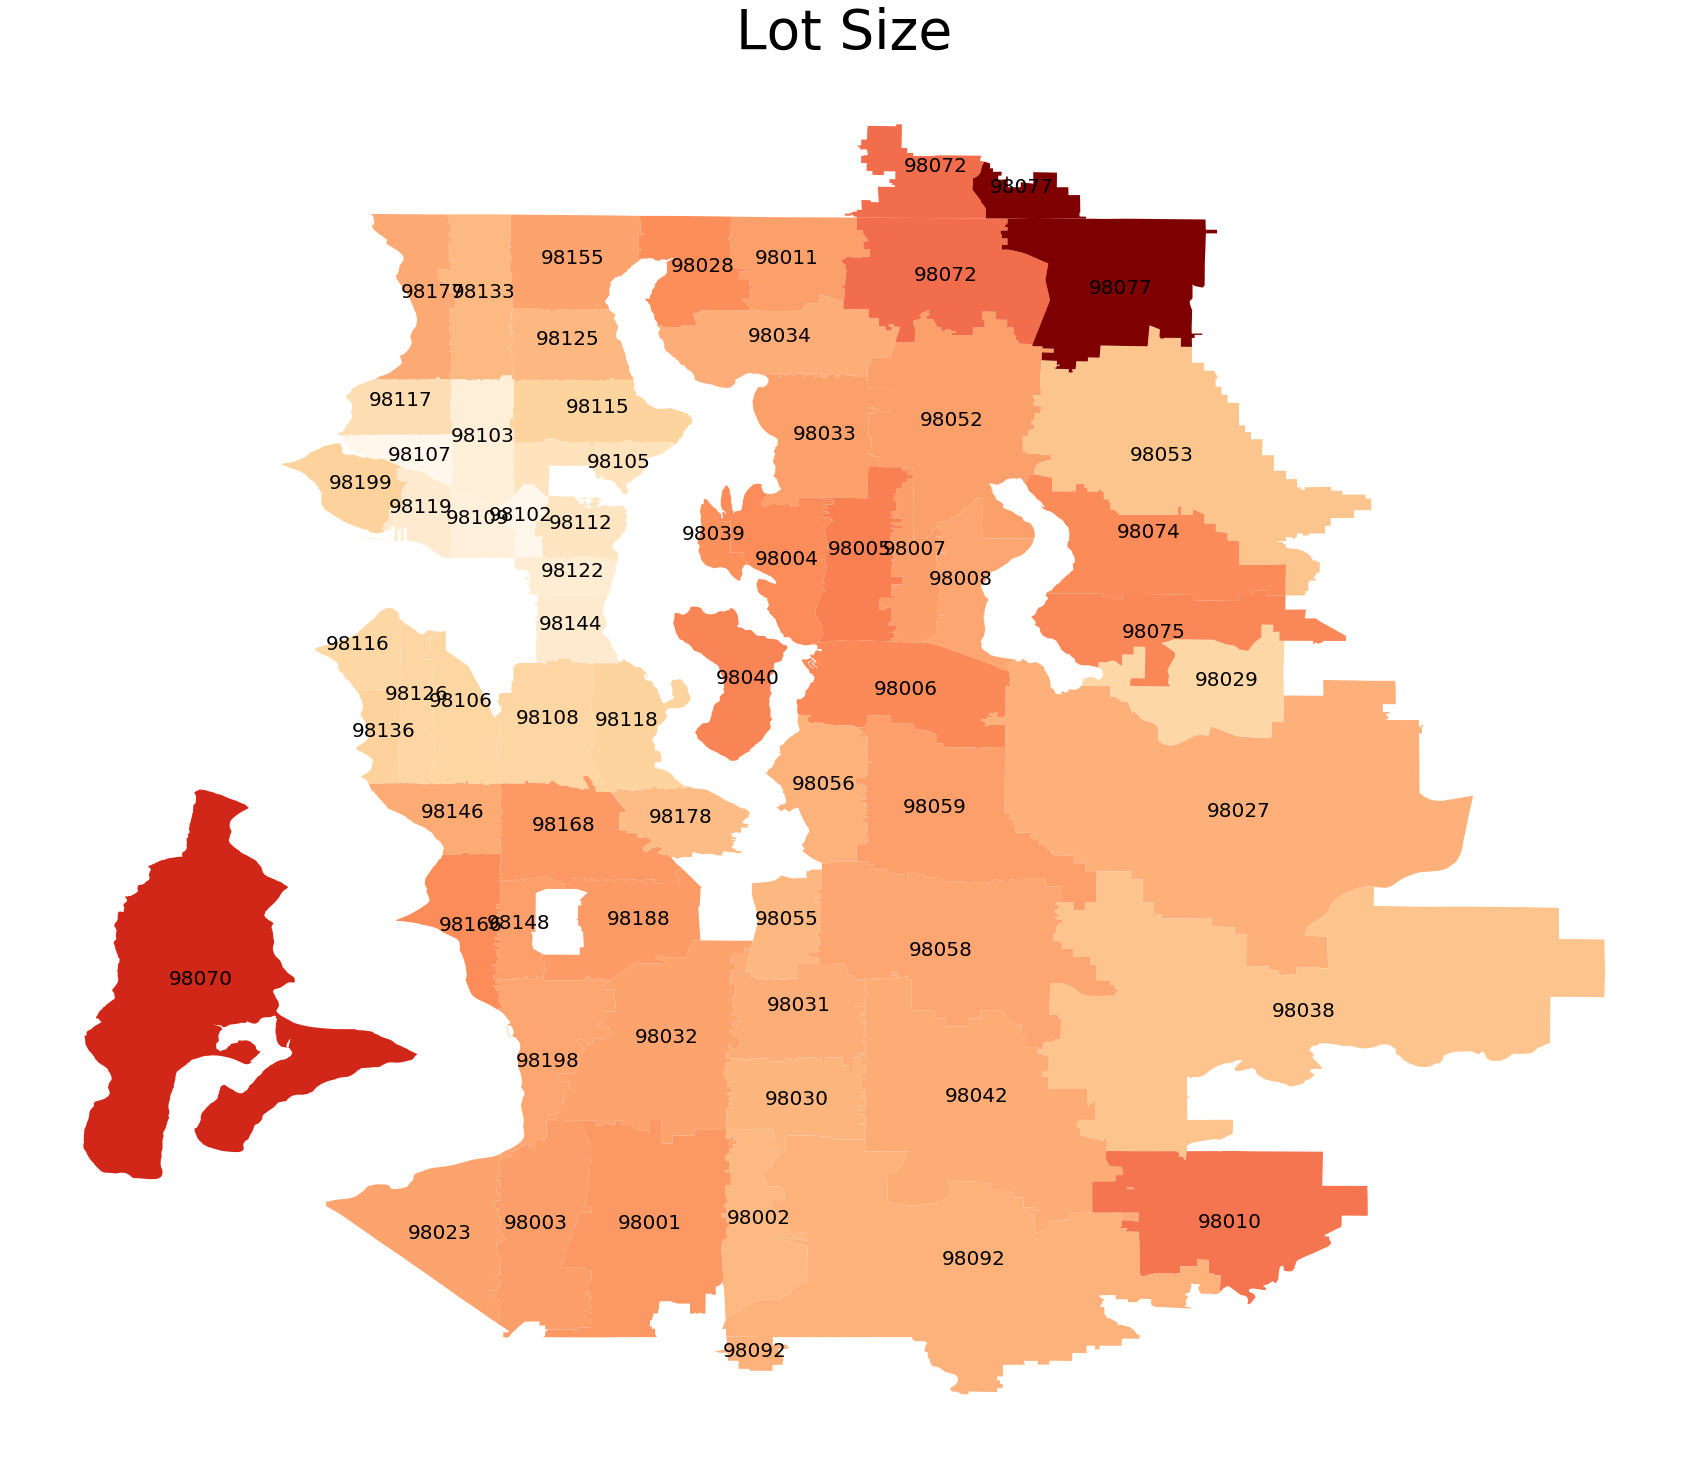

In [37]:
king_count.plot(column='sqft_lot',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Lot Size',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/lot_size_chart')

### Lot size to Living Space ratio

Looks like 98075's neighbors to the north, 98074, have bigger yards but smaller houses. 
Lets engineer a new features called "indoor/lot". This will be ratio of the indoor square footage to the lot size. 
Basically, how much indoor space per unit of lot size. Lets make a new map for this feature. Might be a better way to get an estimate of living space density.

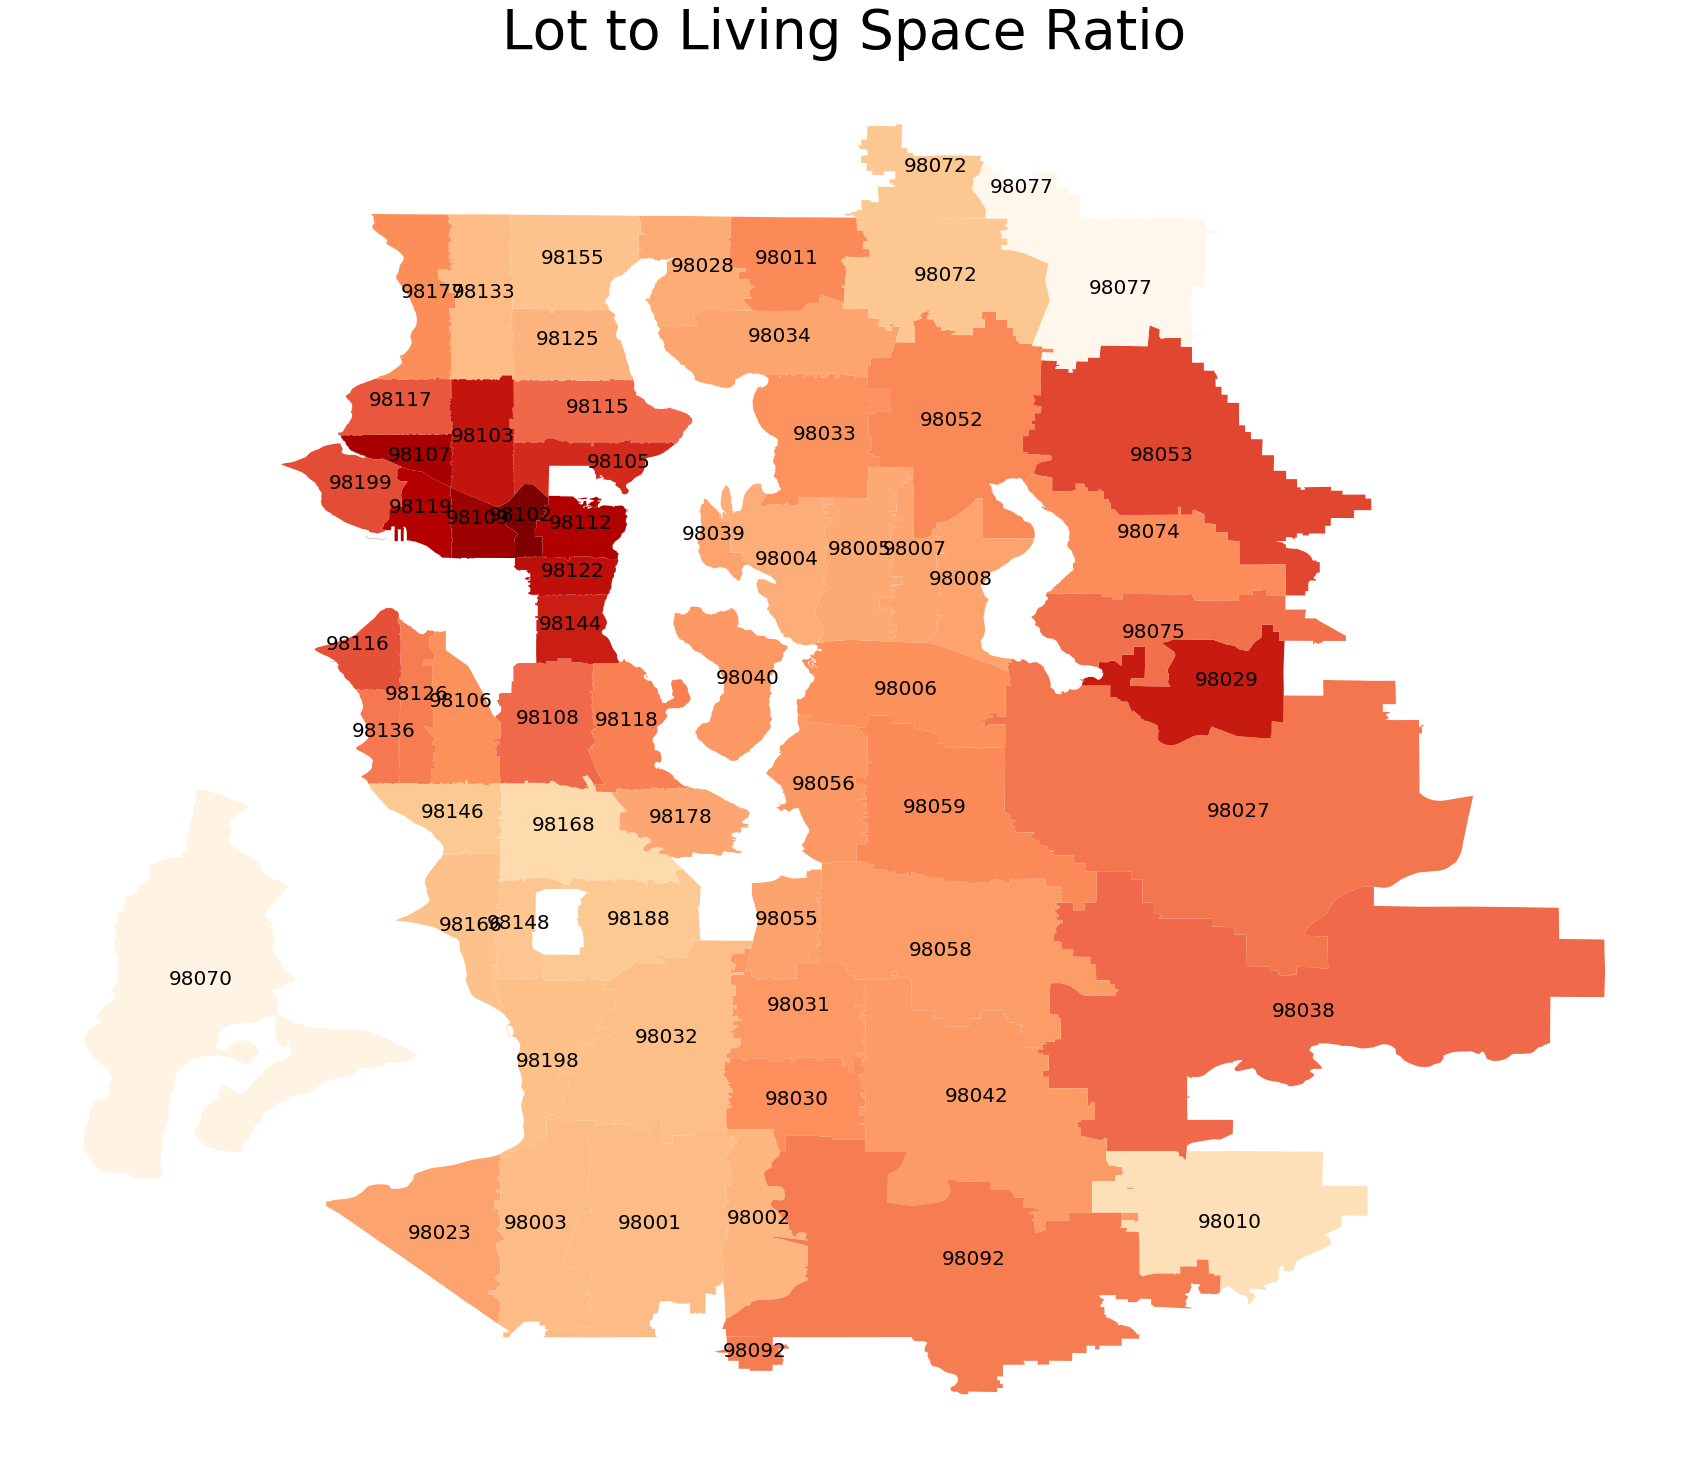

In [38]:
king_count['indoor/lot'] = king_count['sqft_living']/king_count['sqft_lot']

king_count.plot(column='indoor/lot',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Lot to Living Space Ratio',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/lot_vs_indoor_map')

Fascinating. As well see, there is more living space on each lot closer to the city center. This is probably due to the fact there are more apartment buildings closer to the city, so the living space per unit area is denser which is in line with what we expect from major cities. 

It also confirms that 98074 people do have larger yards, while 98075 folks have larger houses. 


# MODEL

Our aim for the proejct is to build a model that can predict the price of a home based on other data about that home, with relative accuracy. To achieve this goal we will use multiple linear regression methods implemented using statsmodels. 

Our overall methodology will be as follows

1. We will pull in different version of our primary dataset, modified in different ways for each trial. 
2. We will fit a preliminary model to this data set. 
3. We will assess the p-values assigned to the co-efficients of our preliminary model, filter them out, and re-train our model
4. We will validate the model using train-test-split over a number of iterations to ensure the integrity of our results. 

To filter out features with high p-values, we will use the following functions:

In [39]:
def remove_pvals (model,dataframe):
    ''' Removes columns representing features with high p-values'''
    pvalues = round(model.pvalues,4)
    pvalues = pvalues.drop('const')
    high_pvalues = pvalues[pvalues > 0.05]    
    high_list = list(high_pvalues.index)

    dataframe = dataframe.drop(high_list,axis=1)
    
    return dataframe 

For our first trial, we will use a custom function to identify what constitutes a good sample size. For the remaining trials, we will assume that it is still the best sample size to use to split the data into training and test sets. 

The following function will split our dataset into chunks ranging from 5% of the dataset to 95% of the dataset, in increments of 5%. For each test, we will generate a hundered random splits of the data into training and test sets of the given test size. We will fit our model, use it to predict values on the test set and the gather the mean squared error for each iteration in the 25 random samples. We will take the average mean squared error from 25 samples at each test size and add them to a results data frame. In this way, we will be able to analyze the spread in the mean squared error between the training set and the test set, for different sizes of test sets. 

In [40]:
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize'] = (20,10)

def test_size_validation (predictors,target):
    collection = []
    size = []
    x= 0.05
    
    while x < 0.95:
        
        errorlist = []
        
        for j in range(1,50):
            
            x_train,x_test,y_train,y_test= train_test_split(predictors,target,test_size=x)
            
            x_train_int= sm.add_constant(x_train)
            
            x_test_int= sm.add_constant(x_test)
            
            olsmod = sm.OLS(y_train,x_train_int).fit()
                       
            y_train_hat = olsmod.predict(x_train_int)
            
            y_test_hat = olsmod.predict(x_test_int)
            
            train_mse = np.sum((y_train - y_train_hat)**2/len(y_train))

            test_mse = np.sum((y_test - y_test_hat)**2/len(y_test))
            
            errorlist.append([train_mse,test_mse])


        saveframe = pd.DataFrame(errorlist,columns=['train','test'])   
        collection.append([str(x), round(saveframe['train'].mean(),3),round(saveframe['test'].mean(),3),0])   

        x = round((x + 0.05),2)

    coll_frame = pd.DataFrame(collection,columns=['size','train','test','delta%'])
    coll_frame['delta%'] = ((coll_frame['test'] - coll_frame['train'])/coll_frame['train']) * 100
    coll_frame['delta%'] = round(coll_frame['delta%'],2)
    coll_frame.set_index('size',inplace=True)    
    
    return coll_frame


The function below will chart the results of our test size validation function. 

In [41]:
def chart_train_test (predictors,target):
    coll_frame = test_size_validation(predictors, target)

    fig, ax = plt.subplots(2,1)

    coll_frame.sort_index(ascending=True,inplace=True)

    ax[0].scatter(coll_frame.index.values,coll_frame['train'],c='red')
    ax[0].scatter(coll_frame.index.values,coll_frame['test'],c='blue')

    coll_frame.sort_values('delta%',ascending=True,inplace=True)
    ax[1].bar(coll_frame.index.values,coll_frame['delta%'])



The following function will generate 25 different training and testing sets of the specified size, train and fit a model one each, gather up the results and average them out. This will ensure that our results are not affected too much by randomness. We will collect the mean r2, rmse as well as rmse expressed as percentage of target mean. This last metrics should allow us to compare models where the target is on different scales. 

In [42]:
from math import sqrt
def mse_validation (predictors,target,size):
    collection = []
              
    errorlist = []

    for j in range(1,25):

        x_train,x_test,y_train,y_test= train_test_split(predictors,target,test_size=size)

        x_train_int= sm.add_constant(x_train)

        x_test_int= sm.add_constant(x_test)

        olsmod = sm.OLS(y_train,x_train_int).fit()

        y_train_hat = olsmod.predict(x_train_int)

        y_test_hat = olsmod.predict(x_test_int)

        train_mse = np.sum((y_train - y_train_hat)**2/len(y_train))

        test_mse = np.sum((y_test - y_test_hat)**2/len(y_test))
        
        train_r2 = olsmod.rsquared
        
        train_rmse = sqrt(train_mse)
        
        test_rmse = sqrt(test_mse)
        
        #train_mape = (abs(y_train - y_train_hat)/abs(y_train))*100
        
        #test_mape = (abs(y_test - y_train_hat)/abs(y_test))*100

        errorlist.append([train_mse,test_mse,train_r2,train_rmse,test_rmse]) #,train_mape,test_mape])

    saveframe = pd.DataFrame(errorlist,columns=['train','test','r2','train_rmse','test_rmse']) # ,'train_mape','test_mape'
    
    report_dict = {}
    
    report_dict['train_mean_squared_error'] = saveframe['train'].mean()
    report_dict['test_mean_squared_error'] = saveframe['test'].mean()
    report_dict['train_rmse'] = saveframe['train_rmse'].mean()
    report_dict['test_rmse'] = saveframe['test_rmse'].mean()
    #report_dict['train_mape'] = saveframe['train_mape'].mean()
    #report_dict['test_mape'] = saveframe['test_mape'].mean()
    report_dict['train_mean_vs_error'] = (saveframe['train_rmse'].mean()/target.mean())*100
    report_dict['test_mean_vs_error'] = (saveframe['test_rmse'].mean()/target.mean())*100
    report_dict['mean_r2'] = round(saveframe['r2'].mean(),2)
    
    
    report_frame = pd.DataFrame.from_dict(report_dict,orient='index',columns=['Scores'])  
    
    return report_frame

## First Trial
Lets fit our first model. We will use df2, the current version of our processed dataframe, as the base dataset we will use to train our model. 

### Preliminary Model

In [43]:
df2_1 = df2.copy()
df2_1 = df2_1.fillna(0)

target = df2_1['price']
predictors = df2_1.drop('price',axis=1)

pred_int = sm.add_constant(predictors)
model = sm.OLS(target,pred_int).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     986.0
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:59:06   Log-Likelihood:            -2.3169e+05
No. Observations:               18015   AIC:                         4.636e+05
Df Residuals:                   17931   BIC:                         4.642e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.07e+05   1.34e+04    -30.379      0.000   -4.33e+05   -3.81e+05
bedrooms      -1.986e+04   3989.370     -4.979      0.000   -2.77e+04    -1.2e+04
bathrooms      9.636e+04   8101.430     11.895      0.000    8.05e+04    1.12e+05
sqft_living    5.065e+05   1.21e+04     41.866      0.000    4.83e+05     5.3e+05
sqft_lot       1.497e+05   7655.016     19.558      0.000    1.35e+05    1.65e+05
floors         6574.9795   5393.292      1.219      0.223   -3996.392    1.71e+04
waterfront     2.384e+05   1.37e+04     17.459      0.000    2.12e+05    2.65e+05
view           1.744e+05   5021.956     34.731      0.000    1.65e+05    1.84e+05
condition      8.813e+04   4848.797     18.175      0.000    7.86e+04    9.76e+04
grade          4.783e+05   1.09e+04     44.012      0.000    4.57e+05       5e+05
sqft_basement -6.745e+04   6025.710    -11.194      0.000   -7.93e+04   -5.56e+04
yr_built      -6.911e+04   4784.219    -14.444      0.000   -7.85e+04   -5.97e+04
zipcode        2.989e+05   1.96e+04     15.225      0.000     2.6e+05    3.37e+05
lat            3.526e+04   2.64e+04      1.336      0.182   -1.65e+04     8.7e+04
long          -7.398e+04   3.68e+04     -2.008      0.045   -1.46e+05   -1781.402
sqft_living15  1.017e+05   8048.168     12.638      0.000    8.59e+04    1.17e+05
98002          2.902e+04   8833.731      3.285      0.001    1.17e+04    4.63e+04
98003          -1.26e+04   7864.247     -1.603      0.109    -2.8e+04    2810.233
98004          5.292e+05   1.57e+04     33.672      0.000    4.98e+05     5.6e+05
98005          3.225e+05   1.62e+04     19.884      0.000    2.91e+05    3.54e+05
98006          2.599e+05   1.32e+04     19.627      0.000    2.34e+05    2.86e+05
98007          2.357e+05   1.67e+04     14.105      0.000    2.03e+05    2.68e+05
98008          2.209e+05   1.57e+04     14.054      0.000     1.9e+05    2.52e+05
98010          1.014e+05   1.45e+04      6.981      0.000    7.29e+04     1.3e+05
98011          1.064e+05   2.03e+04      5.251      0.000    6.67e+04    1.46e+05
98014          1.047e+05   2.36e+04      4.435      0.000    5.84e+04    1.51e+05
98019          6.092e+04   2.16e+04      2.819      0.005    1.86e+04    1.03e+05
98022         -9870.2717   1.33e+04     -0.740      0.460    -3.6e+04    1.63e+04
98023         -5.613e+04   7109.777     -7.895      0.000   -7.01e+04   -4.22e+04
98024          1.097e+05   2.21e+04      4.964      0.000    6.64e+04    1.53e+05
98027          1.743e+05   1.23e+04     14.160      0.000     1.5e+05    1.98e+05
98028          6.594e+04    1.8e+04      3.656      0.000    3.06e+04    1.01e+05
98029          1.947e+05   1.38e+04     14.124      0.000    1.68e+05    2.22e+05
98030         -3.748e+04   7722.826     -4.853      0.000   -5.26e+04   -2.23e+04
98031          -3.67e+04   7693.916     -4.770   

Not bad. We got an R-2 of 0.82 and some features with high p-values. JB scores a tad high, and there is some skew and kurtosis. Lets take p-values out and retrain

### Filter out High p-Values

In [44]:
df2_1 = remove_pvals(model,df2_1)

target = df2_1['price']
predictors = df2_1.drop('price',axis=1)

pred_int = sm.add_constant(predictors)
model = sm.OLS(target,pred_int).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1103.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:59:06   Log-Likelihood:            -2.3172e+05
No. Observations:               18015   AIC:                         4.636e+05
Df Residuals:                   17940   BIC:                         4.642e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.183e+05   8827.116    -47.392      0.000   -4.36e+05   -4.01e+05
bedrooms      -1.959e+04   3989.388     -4.911      0.000   -2.74e+04   -1.18e+04
bathrooms      9.712e+04   7926.720     12.252      0.000    8.16e+04    1.13e+05
sqft_living    5.107e+05   1.16e+04     43.987      0.000    4.88e+05    5.33e+05
sqft_lot        1.55e+05   7091.279     21.863      0.000    1.41e+05    1.69e+05
waterfront     2.403e+05   1.36e+04     17.610      0.000    2.14e+05    2.67e+05
view            1.72e+05   4999.192     34.411      0.000    1.62e+05    1.82e+05
condition      8.876e+04   4832.199     18.368      0.000    7.93e+04    9.82e+04
grade          4.806e+05   1.08e+04     44.441      0.000    4.59e+05    5.02e+05
sqft_basement -7.257e+04   5216.728    -13.911      0.000   -8.28e+04   -6.23e+04
yr_built      -6.466e+04   4639.548    -13.936      0.000   -7.38e+04   -5.56e+04
zipcode        3.405e+05   8066.387     42.218      0.000    3.25e+05    3.56e+05
long           -5.83e+04    1.7e+04     -3.422      0.001   -9.17e+04   -2.49e+04
sqft_living15  1.047e+05   7987.407     13.111      0.000    8.91e+04     1.2e+05
98002          3.501e+04   7659.553      4.570      0.000       2e+04       5e+04
98004          5.506e+05   8026.698     68.599      0.000    5.35e+05    5.66e+05
98005          3.421e+05   9032.423     37.873      0.000    3.24e+05     3.6e+05
98006          2.769e+05   5967.306     46.398      0.000    2.65e+05    2.89e+05
98007          2.555e+05   9489.258     26.927      0.000    2.37e+05    2.74e+05
98008          2.406e+05   6929.745     34.724      0.000    2.27e+05    2.54e+05
98010           1.03e+05   1.17e+04      8.774      0.000       8e+04    1.26e+05
98011          1.343e+05   7841.779     17.126      0.000    1.19e+05     1.5e+05
98014          1.226e+05    1.2e+04     10.236      0.000    9.91e+04    1.46e+05
98019          8.306e+04   8503.514      9.767      0.000    6.64e+04    9.97e+04
98023         -5.386e+04   5783.420     -9.314      0.000   -6.52e+04   -4.25e+04
98024          1.202e+05   1.67e+04      7.210      0.000    8.76e+04    1.53e+05
98027          1.846e+05   6360.329     29.025      0.000    1.72e+05    1.97e+05
98028          9.104e+04   6383.606     14.262      0.000    7.85e+04    1.04e+05
98029          2.058e+05   6417.550     32.068      0.000    1.93e+05    2.18e+05
98030         -3.554e+04   6524.131     -5.448      0.000   -4.83e+04   -2.28e+04
98031         -3.292e+04   6319.684     -5.210      0.000   -4.53e+04   -2.05e+04
98032         -4.522e+04   9246.424     -4.890      0.000   -6.33e+04   -2.71e+04
98033           2.93e+05   5475.643     53.514      0.000    2.82e+05    3.04e+05
98034          1.423e+05   4824.315     29.492      0.000    1.33e+05    1.52e+05
98039          6.568e+05   3.13e+04     21.005   

Not a dramatic improvement. Lets keep going

### Test Size Validation 
Lets see what a good size is for our test sets. 

In [45]:
#chart_train_test (predictors,target)

It seems like a test data set size of 20% is a good size for splitting our dataset. 

### Validation 
Now lets use our validation function to make sure that the results of our model hold up across different random iterations of train-test-split

In [46]:
display(mse_validation(predictors,target,0.2))

,Scores
train_mean_squared_error,"8,705,449,246.96"
test_mean_squared_error,"8,762,450,158.32"
train_rmse,"93,302.05"
test_rmse,"93,592.99"
train_mean_vs_error,19.79
test_mean_vs_error,19.86
mean_r2,0.82


Looks like our r2 holds up. RMSE to target mean ratio is a tad high.

## Second Trial
Let's see if we cant improve the performance of our model a little bit. To do so, let's revisit our data. 

In [47]:
print(phase2_take1.keys())

dict_keys(['categ_culled', 'contin_cull', 'contin_cull_thresh', 'cols_normed', 'colinear_columns', 'categ_cols', 'scaled_cols'])


### Preliminary Model
Recall that earlier, we decided not to normalize or scale the target feature, 'price'. In our second trial, lets start by just scaling the target and fitting a new model to see if there is any improvement. 

In [48]:
df2_2 = df1.copy()
df2_2 = df1.fillna(0)

phase2_take2 = phase2_take1.copy()
phase2_take2['scaled_cols'].append('price')

df2_2 = pre_process(df2_2,phase2_take2)

target2 = df2_2['price']
predictors2 = df2_2.drop('price',axis=1)

pred_int2 = sm.add_constant(predictors2)
model2 = sm.OLS(target2,pred_int2).fit()

display(model2.summary())

Rows Dropped: 3405    Rows Left: 18015   Percentage Remaining: 84.1
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     991.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:59:37   Log-Likelihood:                 22164.
No. Observations:               18015   AIC:                        -4.416e+04
Df Residuals:                   17929   BIC:                        -4.349e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0079      0.001    -15.483      0.000      -0.009      -0.007
bedrooms         -0.0138      0.003     -4.554      0.000      -0.020      -0.008
bathrooms         0.0724      0.006     11.772      0.000       0.060       0.084
sqft_living      -0.0399      0.022     -1.779      0.075      -0.084       0.004
sqft_lot          0.1068      0.009     11.370      0.000       0.088       0.125
floors           -0.0103      0.004     -2.470      0.014      -0.018      -0.002
waterfront        0.0951      0.005     18.343      0.000       0.085       0.105
view              0.1267      0.004     33.105      0.000       0.119       0.134
condition         0.0704      0.004     19.111      0.000       0.063       0.078
grade             0.3497      0.008     42.127      0.000       0.333       0.366
sqft_above        0.1554      0.007     20.920      0.000       0.141       0.170
sqft_basement     0.1316      0.010     13.309      0.000       0.112       0.151
yr_built         -0.0484      0.004    -13.292      0.000      -0.055      -0.041
zipcode       -1.283e-05   4.76e-07    -26.942      0.000   -1.38e-05   -1.19e-05
lat               0.0318      0.020      1.587      0.112      -0.007       0.071
long             -0.0563      0.028     -2.012      0.044      -0.111      -0.001
sqft_living15     0.0794      0.006     12.903      0.000       0.067       0.091
sqft_lot15       -0.0017      0.002     -0.793      0.428      -0.006       0.002
98002             0.0201      0.007      2.987      0.003       0.007       0.033
98003            -0.0074      0.006     -1.239      0.215      -0.019       0.004
98004             0.4061      0.012     33.488      0.000       0.382       0.430
98005             0.2462      0.013     19.599      0.000       0.222       0.271
98006             0.2016      0.010     19.420      0.000       0.181       0.222
98007             0.1845      0.013     14.145      0.000       0.159       0.210
98008             0.1740      0.012     14.051      0.000       0.150       0.198
98010             0.0881      0.011      7.895      0.000       0.066       0.110
98011             0.0897      0.016      5.583      0.000       0.058       0.121
98014             0.0920      0.019      4.952      0.000       0.056       0.128
98019             0.0636      0.018      3.633      0.000       0.029       0.098
98022             0.0149      0.010      1.518      0.129      -0.004       0.034
98023            -0.0169      0.006     -3.012      0.003      -0.028      -0.006
98024             0.1090      0.018      6.183      0.000       0.074       0.143
98027             0.1603      0.011     14.867      0.000       0.139       0.181
98028             0.0786      0.016      5.043      0.000       0.048       0.109
98029             0.1803      0.012     14.995   

Interesting. Looks like our R-squared values went up slightly. But so did skew and kurtosis. 

### Fitler out high p-values
Lets remove high p value features.

In [49]:
df2_2 = remove_pvals(model2,df2_2)

target2 = df2_2['price']
predictors2 = df2_2.drop('price',axis=1)

pred_int2 = sm.add_constant(predictors2)
model2 = sm.OLS(target2,pred_int2).fit()

display(model2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1121.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        05:01:10   Log-Likelihood:                 22144.
No. Observations:               18015   AIC:                        -4.414e+04
Df Residuals:                   17939   BIC:                        -4.354e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8617      5.536      0.878      0.380      -5.990      15.713
bedrooms         -0.0151      0.003     -5.072      0.000      -0.021      -0.009
bathrooms         0.0717      0.006     11.733      0.000       0.060       0.084
sqft_lot          0.1012      0.006     17.460      0.000       0.090       0.113
floors           -0.0098      0.004     -2.362      0.018      -0.018      -0.002
waterfront        0.0975      0.005     19.014      0.000       0.087       0.108
view              0.1279      0.004     33.733      0.000       0.121       0.135
condition         0.0709      0.004     19.286      0.000       0.064       0.078
grade             0.3469      0.008     41.941      0.000       0.331       0.363
sqft_above        0.1435      0.003     47.252      0.000       0.138       0.150
sqft_basement     0.1158      0.004     26.647      0.000       0.107       0.124
yr_built         -0.0480      0.004    -13.214      0.000      -0.055      -0.041
zipcode       -6.188e-05   5.65e-05     -1.096      0.273      -0.000    4.88e-05
long             -0.0210      0.016     -1.289      0.197      -0.053       0.011
sqft_living15     0.0775      0.006     12.844      0.000       0.066       0.089
98002             0.0144      0.006      2.489      0.013       0.003       0.026
98004             0.4158      0.006     68.530      0.000       0.404       0.428
98005             0.2549      0.007     37.002      0.000       0.241       0.268
98006             0.2073      0.005     44.843      0.000       0.198       0.216
98007             0.1927      0.007     26.536      0.000       0.178       0.207
98008             0.1815      0.005     33.639      0.000       0.171       0.192
98010             0.0776      0.009      8.434      0.000       0.060       0.096
98011             0.1069      0.006     18.097      0.000       0.095       0.118
98014             0.0939      0.010      9.509      0.000       0.075       0.113
98019             0.0730      0.007     10.507      0.000       0.059       0.087
98023            -0.0172      0.004     -3.975      0.000      -0.026      -0.009
98024             0.1074      0.013      8.280      0.000       0.082       0.133
98027             0.1626      0.005     32.165      0.000       0.153       0.172
98028             0.0979      0.005     20.578      0.000       0.089       0.107
98029             0.1829      0.005     35.014      0.000       0.173       0.193
98033             0.2582      0.004     62.675      0.000       0.250       0.266
98034             0.1445      0.004     39.956      0.000       0.137       0.152
98038             0.0317      0.004      7.636      0.000       0.024       0.040
98039             0.5488      0.024     23.136      0.000       0.502       0.595
98040             0.3441      0.006     57.210   

### Validation
And now lets validate

In [51]:
display(mse_validation(predictors2,target2,0.2))

,Scores
train_mean_squared_error,0.01
test_mean_squared_error,0.01
train_rmse,0.07
test_rmse,0.07
train_mean_vs_error,23.43
test_mean_vs_error,23.49
mean_r2,0.82


Looks like the slightly higher r2 in our preliminary model was a statistical fluke. Controlling for randomnes in test set selection r2 stays the same. However, looks like mean error got significant worse, by alomst 4 percentage points. 

## Third Trial

In this trial lets normalize 'price' in addition to scaling it and see what happens. 

### Preliminary Model

In [55]:
phase2_take3 = phase2_take1.copy()
phase2_take3['scaled_cols'].append('price')
phase2_take3['cols_normed'].append('price')

df2_3 = df1.copy()
df2_3 = df1.fillna(0)

df2_3 = pre_process(df2_3,phase2_take3)

target3 = df2_3['price']
predictors3 = df2_3.drop('price',axis=1)

pred_int3 = sm.add_constant(predictors3)
model3 = sm.OLS(target3,pred_int3).fit()

display(model3.summary())

Rows Dropped: 3405    Rows Left: 18015   Percentage Remaining: 84.1
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1238.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        05:05:57   Log-Likelihood:                 25546.
No. Observations:               18015   AIC:                        -5.092e+04
Df Residuals:                   17929   BIC:                        -5.025e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0077      0.000    -18.173      0.000      -0.009      -0.007
bedrooms         -0.0070      0.003     -2.775      0.006      -0.012      -0.002
bathrooms         0.0608      0.005     11.930      0.000       0.051       0.071
sqft_living       0.3195      0.019     17.169      0.000       0.283       0.356
sqft_lot          0.0886      0.008     11.373      0.000       0.073       0.104
floors           -0.0157      0.003     -4.556      0.000      -0.022      -0.009
waterfront        0.0721      0.004     16.782      0.000       0.064       0.081
view              0.0788      0.003     24.835      0.000       0.073       0.085
condition         0.0721      0.003     23.590      0.000       0.066       0.078
grade             0.2462      0.007     35.789      0.000       0.233       0.260
sqft_above        0.0285      0.006      4.633      0.000       0.016       0.041
sqft_basement    -0.0271      0.008     -3.307      0.001      -0.043      -0.011
yr_built         -0.0143      0.003     -4.735      0.000      -0.020      -0.008
zipcode       -1.695e-06   3.95e-07     -4.295      0.000   -2.47e-06   -9.21e-07
lat               0.0805      0.017      4.848      0.000       0.048       0.113
long             -0.1732      0.023     -7.467      0.000      -0.219      -0.128
sqft_living15     0.1120      0.005     21.953      0.000       0.102       0.122
sqft_lot15       -0.0034      0.002     -1.991      0.047      -0.007   -5.28e-05
98002             0.0047      0.006      0.840      0.401      -0.006       0.016
98003             0.0013      0.005      0.255      0.799      -0.008       0.011
98004             0.3261      0.010     32.451      0.000       0.306       0.346
98005             0.2340      0.010     22.478      0.000       0.214       0.254
98006             0.2036      0.009     23.661      0.000       0.187       0.220
98007             0.2006      0.011     18.553      0.000       0.179       0.222
98008             0.2047      0.010     19.945      0.000       0.185       0.225
98010             0.1260      0.009     13.626      0.000       0.108       0.144
98011             0.1095      0.013      8.226      0.000       0.083       0.136
98014             0.1237      0.015      8.037      0.000       0.094       0.154
98019             0.1015      0.015      6.999      0.000       0.073       0.130
98022             0.0629      0.008      7.713      0.000       0.047       0.079
98023            -0.0205      0.005     -4.420      0.000      -0.030      -0.011
98024             0.1654      0.015     11.323      0.000       0.137       0.194
98027             0.1982      0.009     22.183      0.000       0.181       0.216
98028             0.0909      0.013      7.041      0.000       0.066       0.116
98029             0.2181      0.010     21.888   

Looks like scaling and normalizing price brings up our R-squared by quite a bit!, JB, Kurtosis and skew came down significantly as well. 

### Filter out high p-values

In [56]:
df2_3 = remove_pvals(model3,df2_3)

target3 = df2_3['price']
predictors3 = df2_3.drop('price',axis=1)

pred_int3 = sm.add_constant(predictors3)
model3 = sm.OLS(target3,pred_int3).fit()

display(model3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1283.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        05:07:31   Log-Likelihood:                 25544.
No. Observations:               18015   AIC:                        -5.092e+04
Df Residuals:                   17932   BIC:                        -5.028e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.7418      2.370     -1.157      0.247      -7.388       1.904
bedrooms         -0.0070      0.003     -2.770      0.006      -0.012      -0.002
bathrooms         0.0609      0.005     11.945      0.000       0.051       0.071
sqft_living       0.3193      0.019     17.158      0.000       0.283       0.356
sqft_lot          0.0881      0.008     11.324      0.000       0.073       0.103
floors           -0.0161      0.003     -4.674      0.000      -0.023      -0.009
waterfront        0.0723      0.004     16.818      0.000       0.064       0.081
view              0.0790      0.003     24.933      0.000       0.073       0.085
condition         0.0723      0.003     23.704      0.000       0.066       0.078
grade             0.2463      0.007     35.844      0.000       0.233       0.260
sqft_above        0.0287      0.006      4.667      0.000       0.017       0.041
sqft_basement    -0.0271      0.008     -3.312      0.001      -0.043      -0.011
yr_built         -0.0142      0.003     -4.718      0.000      -0.020      -0.008
zipcode        2.623e-05   2.42e-05      1.084      0.278   -2.12e-05    7.36e-05
lat               0.0691      0.014      4.864      0.000       0.041       0.097
long             -0.1699      0.022     -7.716      0.000      -0.213      -0.127
sqft_living15     0.1120      0.005     21.975      0.000       0.102       0.122
sqft_lot15       -0.0035      0.002     -2.023      0.043      -0.007      -0.000
98004             0.3300      0.009     38.183      0.000       0.313       0.347
98005             0.2377      0.009     26.189      0.000       0.220       0.255
98006             0.2063      0.007     28.370      0.000       0.192       0.221
98007             0.2042      0.009     21.613      0.000       0.186       0.223
98008             0.2083      0.009     23.799      0.000       0.191       0.225
98010             0.1242      0.009     14.191      0.000       0.107       0.141
98011             0.1159      0.011     10.270      0.000       0.094       0.138
98014             0.1276      0.014      9.266      0.000       0.101       0.155
98019             0.1067      0.012      8.539      0.000       0.082       0.131
98022             0.0583      0.008      7.673      0.000       0.043       0.073
98023            -0.0223      0.004     -5.896      0.000      -0.030      -0.015
98024             0.1670      0.014     12.327      0.000       0.140       0.194
98027             0.1995      0.008     26.445      0.000       0.185       0.214
98028             0.0969      0.011      9.172      0.000       0.076       0.118
98029             0.2198      0.008     25.964      0.000       0.203       0.236
98030             0.0208      0.005      4.451      0.000       0.012       0.030
98031             0.0243      0.005      5.086   

### Valiation

In [58]:
display(mse_validation(predictors3,target3,0.2))

,Scores
train_mean_squared_error,0.00
test_mean_squared_error,0.00
train_rmse,0.06
test_rmse,0.06
train_mean_vs_error,9.37
test_mean_vs_error,9.47
mean_r2,0.85


Wow! that seemed to have made quite a difference! Rsquared has indeed gone up from 8.2 to 8.5. And there is a huge improvement in mean squared error. It seems to have gone down by half from our first model. 

It seems scaling and normalizing the target is the way to go. At least in this case. Lets select model 3 as our model 

In [59]:
import pickle

model = model3

with open('model.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)


# INTERPRET

## Explanation of Final Model.¶

Our final model has an r-squared value of .85. This means that 85 percent of the variation above the mean price can be explained by our model, which is pretty decent for a regression model.

Our root mean error is within 10% of the mean of the actual price. This means that our predictions are on average within 10% of the actual price

## QUESTION 3: Which features have the greatest effect on price?

To answer this question, lets examine the coefficients from our updated model.

The following function returns a chart that shows us the magnitude of the coefficients for each feature stacked in order. A red bar indicated negative correlation, while a green bar indicates positive correlation. This way we can observe and assess the relative impact of each feature. We will use the OLS model. 

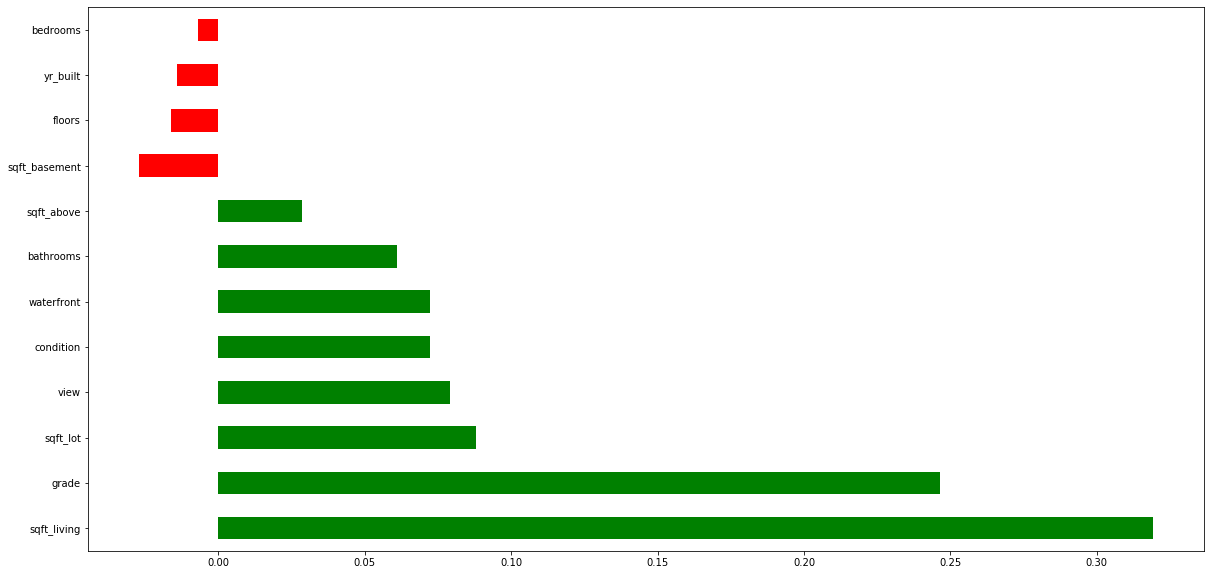

In [61]:
def coef_charts (model):
    main_features = model.params.iloc[:13].to_frame()
    main_features.rename(columns={0:'coeffs'},inplace=True)
    main_features.drop('const',axis=0,inplace=True)

    main_features['magnitude'] = abs(main_features['coeffs'])
    main_features['positive'] = main_features['coeffs'] < 0

    main_features.sort_values(by='magnitude',ascending=False,inplace=True)
    
    main_features['coeffs'].plot(kind='barh',color=main_features.positive.map({True: 'r', False: 'g'}))
   
coef_charts(model)
plt.savefig('plot_images/coeff_chart')
   

From this chart we can see that square footage of living space has the most impact on price. This seems in line with what we know about the fundamental mechanics of the real estate market. People are buying a place to live and the more living space per dollar they can get the higher they will be willing to pay. 

Grade Is the second most important feature, which makes sense because the grade system is probably meant to reflect the value of the house and is essentially an analogue version of our linear regression model.

Looks like waterfront and view go a long way towards affecting a houe price. This also makes sense once we factor in what we saw in our exploration of the mapped data earlier. The most expensive neighborhoods were right next to the water or surrounded by it, and probably had amazing veiws. 

We also see that there is a slight inverse relationship between the year the house was built and the price. This might seem counter intuitive, but it makes sense if we consider that houes built closer to the city were built first and their proximity to the city makes them more valuable. Whereas the suburbs were built later, and in areas where land is more abundant and thus cheaper. 


# CONCLUSIONS & RECOMMENDATIONS

Based on our analysis we can make the following conclusions:

Sellers looking to make profits from investing in property are probably better off buying houses towards the city center, and in neighborhood like Medina and Mercer Island. These have higher sales prices and thus, probably yield higher profits. Also, buying closer to the city would probably lead to more incrases in price, since the scarcity will only increase. 

Buyers are better off buying in the suburubs, especially if they want maximum living space for their money. They have options to choose between bigger houses or smaller yards; they can buy the zipcode that fits their needs. 
